# Поездки на самокатах

## Подготовка данных

### Импортируем библиотеки, посмотрим на основные характеристики данных, пропуски и дубликаты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('kicksharing.csv')

In [ ]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_rk,396749.0,NaN,NaN,NaN,289223558.141203,38134583.990429,252611203.0,261815012.0,270436665.0,343267787.0,356252786.0
party_rk,396749.0,NaN,NaN,NaN,598842595.687586,331167510.804468,14717.0,296232305.0,611009154.0,864692067.0,1301075452.0
gender_cd,393828,2,M,335458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,396749.0,NaN,NaN,NaN,31.544006,9.434545,12.0,24.0,31.0,37.0,94.0
education_level_cd,190059,5,GRD,94341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status_cd,217729,5,UNM,116094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lvn_state_nm,362572,212,Г МОСКВА,90897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minute_cost,396749.0,NaN,NaN,NaN,7.288688,1.289492,1.5,6.49,7.49,8.22,19.99
activation_cost,396749.0,NaN,NaN,NaN,42.593226,11.989974,0.0,30.0,50.0,50.0,50.0
hold_amount,396749.0,NaN,NaN,NaN,299.983869,1.939153,80.0,300.0,300.0,300.0,500.0


* В колонке lvn_state_nm (регион проживания человека) подозрительно много уникальных значений.
* Нужно проверить значения в колонке возраста age.
* Максимальное значение километража distance_km аномальное.
* Значения в loyalty_accrual_rub_amt и loyalty_accrual_bns_amt странные: отрицательные значения и высокое значение кешбэка.
* Во всех колонках, кроме created_dttm,  book_start_dttm,   book_end_dttm, local_book_start_dttm, правильный формат данных. А в этих стоит перевести в формат datetime.

**Дубликатов нет**

In [ ]:
df.duplicated(subset=['order_rk']).sum()

0

**Посмотрим на пропуски**

In [ ]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

Для удобства посмотрим на процент пропусков

In [ ]:
np.round(df.isnull().sum() * 100 / len(df), 2)

order_rk                    0.00
party_rk                    0.00
gender_cd                   0.74
age                         0.00
education_level_cd         52.10
marital_status_cd          45.12
lvn_state_nm                8.61
minute_cost                 0.00
activation_cost             0.00
hold_amount                 0.00
transport_model             0.00
distance_km                 0.00
created_dttm                0.00
book_start_dttm             0.00
book_end_dttm               0.00
book_time_zone_cd           0.00
local_book_start_dttm       0.00
nominal_price_rub_amt       0.00
loyalty_accrual_rub_amt     7.50
loyalty_accrual_bns_amt    94.47
dtype: float64

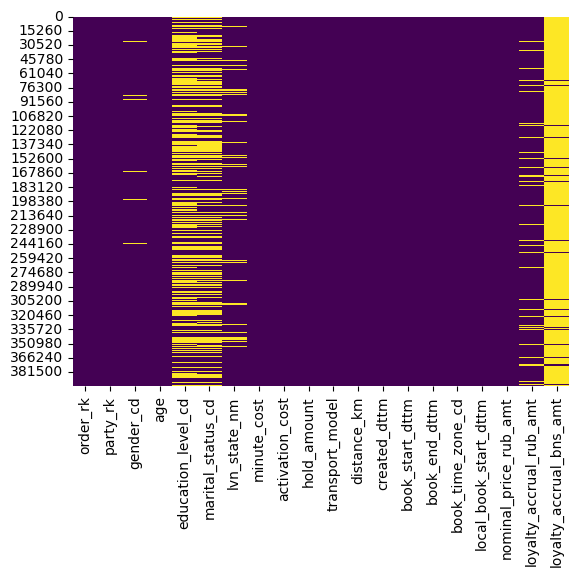

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis');

### Изменим формат колонок с датой в datetime

In [ ]:
cols_to_date = ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']
df[cols_to_date] = df[cols_to_date].apply(pd.to_datetime)

### Создадим колонки с дополнительной информации, касающейся времени и длительности поездок

**Длительность поездки в минутах**

In [ ]:
df['duration_min'] = ((df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60).round(2)

**Для дальнейшего анализа нам понадобится местное время начала поездки. Поэтому вынесем час начала поездки в отдельную колонку.**

In [ ]:
df['start_hour'] = df['local_book_start_dttm'].dt.hour

**Кроме того добавим информацию о времени поездки в зависимости от того, в какое время произошел старт.**

- 6-10 - утро, после 6 до 11 утра
- 11-16 - день, после 11 до 17 часов
- 17-23 - вечер, после 17 до полуночи
- 0-5 - ночь, после полуночи до 6 часов

In [ ]:
def get_time_of_day(hour):
    if 6 <= hour < 11:
        return 'утро 6-11'
    elif 11 <= hour < 17:
        return 'день 11-17'
    elif 17 <= hour < 24:
        return 'вечер 17-24'
    else:
        return 'ночь 0-6'

df['time_of_day'] = df['start_hour'].apply(get_time_of_day)

In [ ]:
df[['local_book_start_dttm', 'start_hour', 'time_of_day']].head()

,local_book_start_dttm,start_hour,time_of_day
0,2024-08-07 11:47:29.325252,11,день 11-17
1,2024-10-17 14:57:24.586000,14,день 11-17
2,2024-09-19 07:34:59.476000,7,утро 6-11
3,2024-10-04 16:05:13.162000,16,день 11-17
4,2024-07-10 06:57:43.017125,6,утро 6-11


**Добавим информацию о дне недели, месяце, флаг для выходного дня**

In [ ]:
df['weekday_name'] = df['local_book_start_dttm'].dt.day_name()

In [ ]:
df['is_weekend'] = df['local_book_start_dttm'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
df['month'] = df['local_book_start_dttm'].dt.month

### Добавим флаг для тех, кто получил кешбэк за поездку

In [ ]:
df['has_loyalty'] = ((df['loyalty_accrual_rub_amt'] > 0) | (df['loyalty_accrual_bns_amt'] > 0)).astype(int)

### Разберемся с колонкой _lvn_state_nm_ (регион проживания)

Нужно унифицировать регионы, чтобы для одной сущности не было разных названий. Для начала нужно:

* ОБЛ. - убрать точки
* ОБЛАСТЬ сократить до ОБЛ
* для городов убрать точки после Г.
* РЕСПУБЛИКА сократить до РЕСП
* вручную внести остальные изменения

In [ ]:
sorted(df['lvn_state_nm'].dropna().astype(str).unique())

In [ ]:
def normalize_region(name):
    # пропускаем NaN или нестроковые значения
    if not isinstance(name, str):
        return name
    name = name.upper().strip()
    name = name.replace('.', '')
    name = name.replace('ОБЛАСТЬ', 'ОБЛ')
    name = name.replace('РЕСПУБЛИКА', 'РЕСП')
    name = name.replace('ГОРОД', 'Г')
    return name.strip()

df['lvn_state_nm'] = df['lvn_state_nm'].apply(normalize_region)

In [ ]:
sorted(df['lvn_state_nm'].dropna().astype(str).unique())

In [ ]:
import re

def normalize_region(name):
    if not isinstance(name, str):
        return name
    name = name.strip()
    name = re.sub(r'( - ЮГРА АО| - ЮГРА| - ЧУВАШИЯ|ЧУВАШИЯ | -| - КУЗБАСС| - КУЗБАСС ОБЛ| КУЗБАСС| ОБЛ КУЗБАСС| ЧУВАШИЯ)', '', name)
    name = re.sub(r'(МОСКВА|МОСКВА Г|ПОСЕЛЕНИЕ СОСЕНСКОЕ)', 'Г МОСКВА', name)
    name = re.sub(r'(САНКТ-ПЕТЕРБУРГ Г|САНКТ-ПЕТЕРБУРГ)', 'Г САНКТ-ПЕТЕРБУРГ', name)
    name = re.sub(r'(МОСКОВСКАЯ|МОСККОВСКАЯ|Г ЗЕЛЕНОГРАД|МО ЗАПАД)', 'ОБЛ МОСКОВСКАЯ', name)
    name = re.sub(r'(НИЖЕГСКАЯ|НИЖЕГСКАЯ ОБЛ|ОБЛ НИЖЕГСКАЯ)', 'ОБЛ НИЖЕГОРОДСКАЯ', name)
    name = re.sub(r'(РЕСП САХА /ЯКУТИЯ/|САХА /ЯКУТИЯ/)', 'РЕСП САХА (ЯКУТИЯ)', name)
    name = re.sub(r'(РУСП ТАТАРСТАН|РЕСП (РЕСП ТАТАРСТАН)|ТАТАРСТАН|РЕСП ТАТАРСТАН (РЕСП ТАТАРСТАН))', 'РЕСП ТАТАРСТАН', name)
    name = re.sub(r'НОВГСКАЯ', 'НОВГОРОДСКАЯ', name)
    name = name.replace('НЕНЕЦКИЙ АО', 'АО ЯМАЛО-НЕНЕЦКИЙ')
    name = name.replace('АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ', 'АО ХАНТЫ-МАНСИЙСКИЙ')
    name = name.replace('ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ', 'АО ХАНТЫ-МАНСИЙСКИЙ')
    name = name.replace('УДМУРТСКАЯ', 'РЕСП УДМУРТСКАЯ')
    name = name.replace('СВЕРДЛОВСКАЯ', 'ОБЛ СВЕРДЛОВСКАЯ')
    name = name.replace('БЕЛГСКАЯ ОБЛ', 'БЕЛГОРОДСКАЯ ОБЛ')
    name = name.replace('Г САМАРА', 'САМАРСКАЯ ОБЛ')
    name = name.replace('ЕВРЕЙСКАЯ АОБЛ', 'АОБЛ ЕВРЕЙСКАЯ')
    name = name.replace('ЛЕНЕНГРАДСКАЯ ОБЛ', 'ЛЕНИНГРАДСКАЯ ОБЛ')
    name = name.replace('ЛНР', 'РЕСП ЛУГАНСКАЯ НАРОДНАЯ')
    name = name.replace('МОГИЛЁВСКАЯ', 'ОБЛ МОГИЛЕВСКАЯ')
    name = name.replace('НОВОЗЫБКОВСКАЯ ОБЛ', 'ОБЛ БРЯНСКАЯ')
    name = name.replace('НОВОСИБИРСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ')
    name = name.replace('ОБЛ БЕЛГСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ')

    if name.endswith(' ОБЛ'):
        name = 'ОБЛ ' + name[:-4].strip()

    if name.endswith(' РЕСП'):
        name = 'РЕСП ' + name[:-5].strip()

    if name.endswith(' КРАЙ'):
        name = 'КРАЙ ' + name[:-5].strip()

    if name.endswith(' АО'):
        name = 'АО ' + name[:-3].strip()

    name = re.sub(r'ОБЛ ОБЛ ', 'ОБЛ ', name)
    name = re.sub(r'РЕСП РЕСП ', 'РЕСП ', name)
    name = re.sub(r'Г Г ', 'Г ', name)

    return name.strip()

df['lvn_state_nm'] = df['lvn_state_nm'].apply(normalize_region)

In [ ]:
sorted(df['lvn_state_nm'].dropna().astype(str).unique())

In [ ]:
# что-то мы сделали не так, поэтому исправим дополнительно оставшиеся ошибки в регионах

def normalize_region(name):
    if not isinstance(name, str):
        return name

    name = name.replace('ISRAEL', 'ИЗРАИЛЬ')
    name = name.replace('ЯМАЛО-АО ЯМАЛО-НЕНЕЦКИЙ', 'АО ЯМАЛО-НЕНЕЦКИЙ')
    name = name.replace('Г МОСКВА Г', 'Г МОСКВА')
    name = name.replace('РЕСП СЕВЕРНАЯ ОСЕТИЯ АЛАНИЯ', 'РЕСП СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ')
    name = name.replace('ОБЛ КЕМЕРОВСКАЯ ОБЛ', 'ОБЛ КЕМЕРОВСКАЯ')
    name = name.replace('РЕСП ТАТАРСТАН (РЕСП ТАТАРСТАН)', 'РЕСП ТАТАРСТАН')

    return name.strip()

df['lvn_state_nm'] = df['lvn_state_nm'].apply(normalize_region)

In [ ]:
sorted(df['lvn_state_nm'].dropna().astype(str).unique())

In [ ]:
df['lvn_state_nm'].nunique()

97

Отлично! Можем заметить, что, кроме российских регионов, в списке также присутствуют регионы республики Беларусь, Израиль, США, Польша. Однако отметим, что поездки через приложение Т-банка возможны на самокатах сервиса МТС Юрент в городах их присутсвия, то есть только по территории России (на 2024 г). Поэтому **это регионы проживания человека, а не регионы пользования самокатами**.

### Посмотрим подробнее на колонки _age, distance_km, loyalty_accrual_rub_amt, loyalty_accrual_bns_amt_, в которых заметили выбросы

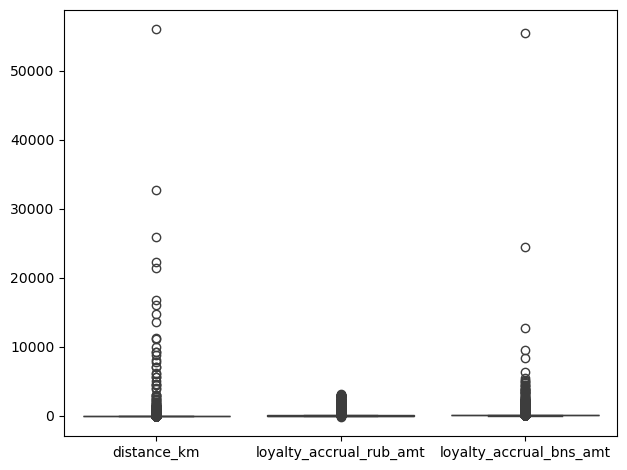

In [ ]:
sns.boxplot(df[['distance_km', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']])
plt.tight_layout();

#### loyalty_accrual_rub_amt и loyalty_accrual_bns_amt

**Ранее заметили, что выплаченный кешбэк в рублях _loyalty_accrual_rub_amt_ в некоторых строках отрицательный.** Поскольку мы не можем быть уверены, ошибка ли это (например, на самом деле кешбэк должен быть положительным), просто удалим эти данные из датасета, тем более их очень мало.

In [ ]:
len(df[df['loyalty_accrual_rub_amt'] < 0])

7

In [ ]:
df.drop(df[df['loyalty_accrual_rub_amt'] < 0].index, inplace=True)

**Заметим, что в данных есть строки, в которых кешбэк был получен деньгами и баллами одновременно, что невозможно (так как оплата происходит одной картой и в зависимости от ее типа начисляется кешбэк баллами или денежными средствами) и указывает на ошибки в данных или сбои в приложении.** Поэтому удалим эти строки тоже.

In [ ]:
len(df[(df['loyalty_accrual_bns_amt'].notnull()) & (df['loyalty_accrual_rub_amt'].notnull())])

4

In [ ]:
df.drop(df[(df['loyalty_accrual_bns_amt'].notnull()) & (df['loyalty_accrual_rub_amt'].notnull())].index, inplace=True)

**Также заметили, что около 2% строк имеют кешбэк, больший, чем стоимость поездки, другими словами клиент вернул больше денег или баллов, чем заплатил за поездку. Мы выяснили, что до конца сентября 2024 года проходила акция, согласно которой за первую поездку давали 100% кешбэк за старт (активацию) и стоимость поездки. Однако кешбэк не может быть выше стоимости поездки.**

In [ ]:
len(df[(df['loyalty_accrual_rub_amt'] > df['nominal_price_rub_amt']) | (df['loyalty_accrual_bns_amt'] > df['nominal_price_rub_amt'])])

8259

In [ ]:
print('Доля строк, в которых кешбэк завышен:')
print(100 * len(df[(df['loyalty_accrual_rub_amt'] > df['nominal_price_rub_amt']) | (df['loyalty_accrual_bns_amt'] > df['nominal_price_rub_amt'])]) / len(df))

Доля строк, в которых кешбэк завышен:
2.081726479439832


Что касается кешбэка, выплаченного в денежных единицах, он оказался завышен в основном до 50 ден. ед.:

In [ ]:
df_filter = df[df['loyalty_accrual_rub_amt'] > df['nominal_price_rub_amt']]
(df_filter['loyalty_accrual_rub_amt'] - df_filter['nominal_price_rub_amt']).value_counts()

2.00      1272
4.00       687
8.00       224
10.00      164
6.00       137
          ... 
17.69        1
128.64       1
48.52        1
13.44        1
19.03        1
Name: count, Length: 1016, dtype: int64

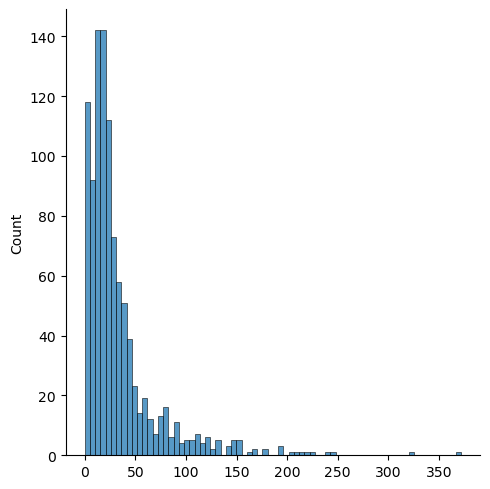

In [ ]:
df_filter = df[df['loyalty_accrual_rub_amt'] > df['nominal_price_rub_amt']]

sns.displot((df_filter['loyalty_accrual_rub_amt'] - df_filter['nominal_price_rub_amt']).value_counts().index);

А кешбэк, полученный бонусами, в основном был завышен на сумму до 1000 усл. ден. ед. Но также встречаются аномальные завышения порядка нескольких тысяч бонусов.

In [ ]:
df_filter = df[df['loyalty_accrual_bns_amt'] > df['nominal_price_rub_amt']]
(df_filter['loyalty_accrual_bns_amt'] - df_filter['nominal_price_rub_amt']).value_counts()

0.12000      38
0.16000      28
0.10000      25
0.08000      24
0.57000      21
             ..
736.97934     1
765.44933     1
254.74430     1
826.85199     1
25.18000      1
Name: count, Length: 2105, dtype: int64

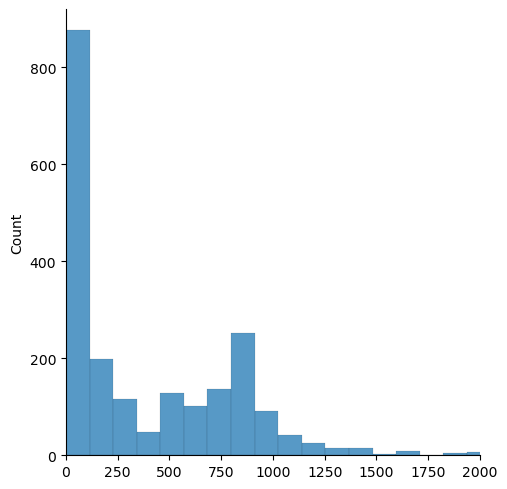

In [ ]:
df_filter = df[df['loyalty_accrual_bns_amt'] > df['nominal_price_rub_amt']]

sns.displot((df_filter['loyalty_accrual_bns_amt'] - df_filter['nominal_price_rub_amt']).value_counts().index)
plt.xlim(0, 2000);

**Поскольку по имеющимся данным затруднительно определить причину завышенного кешбэка, мы не можем внести корректировки в значения кешбэка без искажения данных, поэтому мы исключим эти данные из дальнейшего анализа.**  

**А причину таких аномальных данных нужно выяснять дополнительно. Возможно, это лишь ошибки в датасете, либо же кешбэк действительно был выше стоимости поездки из-за багов сервиса.**

In [ ]:
df.drop(df[(df['loyalty_accrual_rub_amt'] > df['nominal_price_rub_amt']) | (df['loyalty_accrual_bns_amt'] > df['nominal_price_rub_amt'])].index, inplace=True)

#### Добавим флаг для поездок, по которым пользователи получили 100% кешбэк за первую поездку

In [ ]:
def first_loyalty(row):
    if row['loyalty_accrual_rub_amt'] == row['nominal_price_rub_amt'] or row['loyalty_accrual_bns_amt'] == row['nominal_price_rub_amt']:
        return 1
    else:
        return 0

df['has_100_percent_cashback'] = df.apply(first_loyalty, axis=1)

### Разберемся с выбросами и аномалиями

В следующих колонках мы наблюдали выбросы.

In [ ]:
df[['age', 'distance_km', 'duration_min', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,388479.0,31.534562,9.426232,12.00,24.000000,31.000000,37.000000,94.000000
distance_km,388479.0,3.632260,141.682425,0.00,0.936032,1.716553,3.033161,56012.640308
duration_min,388479.0,11.236910,12.610304,0.03,4.730000,7.710000,13.220000,715.170000
nominal_price_rub_amt,388479.0,126.008720,95.567596,0.00,79.960000,103.520000,140.870000,5627.640000
loyalty_accrual_rub_amt,361846.0,34.599209,65.514363,0.20,11.090000,18.415000,33.970000,3185.000000
loyalty_accrual_bns_amt,18820.0,57.795672,33.669886,1.00,39.000000,59.000000,70.000000,958.000000


#### Возраст - _age_

В датасете довольно большое количество поездок осуществлялось пожилыми пользователями. Мы предполагаем, что поездка и оплата осуществлялись с чужих аккаунтов, например, пожилых родственников. Поэтому ничего с этими данными делать не будем. Но стоит помнить, что реальный средний возраст пользователя сервиса поездки самокатов вероятнее всего меньше того, что покажут данные.

In [ ]:
len(df[df['age'] > 60])

3559

Несмотря на то, что Т-банк утверждает, что поездки на самокатах доступны только совершеннолетним лицам, в датасете есть незначительное количество данных, согласно которым оплата происходила детьми или с их счетов. Ошибка либо в самих данных, либо в том, что подрости также могут воспольховаться самокатом и оплатить поездку со своего счета. Исправим эти данные.

In [ ]:
len(df[df['age'] < 18])

45

In [ ]:
def fix_age(age):
    if age < 18:
        return 18
    else:
        return age

df['age'] = df['age'].apply(fix_age)

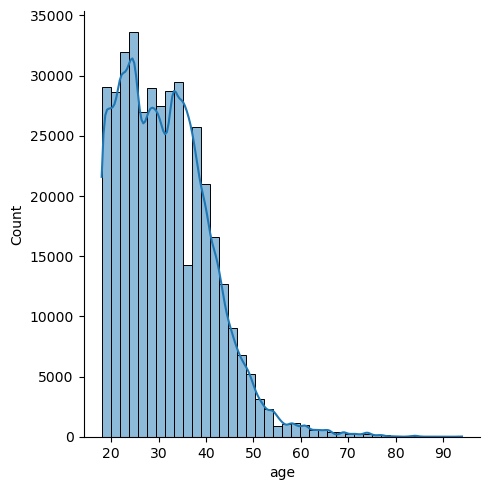

In [ ]:
sns.displot(df['age'], bins=40, kde=True);

**На графике видим, что подавляющее большинство пользователей самокатов находятся в возрасте от 18 до 40 лет. А средний и медианный возраст составляет 31 год, однако эти значения могут быть завышены из-за аккаунтов, зарегистрированных на пожилых людей. Ожидаемо, самокатами пользуются в основном молодые люди.**

#### Километраж поездки _distance_km_ и длительность _duration_min_. Создание колонки для скорости _speed_.

В датасете много данных, в которых километраж поездки оказался высоким и даже аномально высоким, например, несколько тысяч км, что невозможно. Мы удалим эти данные следующим образом: посчитаем скорость поездок; если где-то скорость самоката оказалась выше максимальной доступной, то есть выше 25 км/ч (что может свидетельствовать о завышенном километраже), мы удалим эти данные.

Кроме того, посчитаем долю таких аномальных данных, когда километраж поездки и скорость соответственно были сильно завышены - это может указывать на внутренние сбои приложения, работы самоката или чего-то еще. В этом нужно дополнительно разбираться. Отметим также, что у подавляющего большинства удалаемых нами данных скорость была лишь немного выше допустимых 25 км/ч. Либо программные ограничения на скорость не работали должным образом, либо же в данных километраж немного завышен, вследствие чего скорость тоже завышена.

In [ ]:
# создадим колонку со скоростью, выраженной в км/ч
df['speed'] = df['distance_km'] / (df['duration_min'] / 60)

In [ ]:
df['speed'].describe()

count    388479.000000
mean         25.452628
std        1922.685663
min           0.000000
25%           9.043120
50%          12.844882
75%          17.045704
max      657045.447257
Name: speed, dtype: float64

In [ ]:
df[df['speed'] > 25][['distance_km', 'duration_min', 'speed', 'nominal_price_rub_amt',
       'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].head()

,distance_km,duration_min,speed,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
17,7.158124,16.71,25.702421,119.83,66.11,NaN
32,3.045812,7.10,25.739260,109.92,10.99,NaN
40,3.309015,6.84,29.026444,118.60,76.44,NaN
43,5.199187,7.51,41.538115,95.92,14.39,NaN
74,3.305334,6.60,30.048492,86.73,8.67,NaN


In [ ]:
len(df[(df['speed'] > 25) & (df['speed'] < 35)])

22893

In [ ]:
# доля строк с аномальными скоростями в процентах
np.round((100 * len(df[df['speed'] > 25]) / len(df)), 2)

6.84

In [ ]:
df.drop(df[df['speed'] > 25].index, inplace=True)

#### Километраж поездки _distance_km_, длительность _duration_min_, стоимость поездки _nominal_price_rub_amt_

**Заметим, что в датасете есть много "неудачных" поездок, которые длились меньше минуты и у которых расстояние меньше 100 метров (или даже равно нулю). При этом у части из них произошли списания денежных средств, то есть в некоторых случаях поездка технически успела активироваться.** Мы попробовали разобраться, что формально считается поездкой в  сервисе Т-банка. Поиск в сети не помог, но судя по данным, поездка считается совершенной, если длилась больше 45 секунд, так, у некоторых пользователей списывают деньги за активацию и первую минута. Однако есть и такие поездки, которые длились несколько минут, но за них не были списаны деньги. Поэтому в нашем исследовании мы будем считать поездку неудачной, если было проехано меньше 100 метров и поездка длилась меньше 1.5 минуты. При этом в зависимости от оплаты мы добавим флаги в датасет следующим образом:

* неудачная поездка, оплата прошла _failed_paid_
* неудачная поездка, оплата не прошла _failed_free_
* состоявшаяся поездка с оплатой _successful_

Нам важно так пометить данные, чтобы **исследовать негативный пользовательский опыт**. Важно понять, возвращаются ли пользователи в сервис после неудавшейся поездки, за которую еще могли списать деньги. Важно определить и проблему отмены или бага. Возможно, проблема в конкретной модели самоката/локации/времени поездки.

In [ ]:
df[(df['distance_km'] < 0.1) & (df['duration_min'] < 1.5)][['activation_cost',
                                                          'distance_km',
                                                          'duration_min',
                                                          'nominal_price_rub_amt',
                                                          'loyalty_accrual_rub_amt',
                                                          'loyalty_accrual_bns_amt']].head()

,activation_cost,distance_km,duration_min,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
5,50.0,0.01609,0.66,0.00,NaN,NaN
26,30.0,0.00000,0.75,0.00,NaN,NaN
30,50.0,0.00000,1.11,63.98,9.60,NaN
50,30.0,0.00000,0.90,36.99,36.99,NaN
57,50.0,0.00000,0.61,0.00,NaN,NaN


In [ ]:
failed_filter = df[(df['distance_km'] < 0.1) &
                    (df['duration_min'] < 1.5) &
                    (df['nominal_price_rub_amt'] > 0)]

failed_filter[['distance_km', 'duration_min', 'nominal_price_rub_amt']].describe()

,distance_km,duration_min,nominal_price_rub_amt
count,5867.000000,5867.000000,5867.000000
mean,0.015247,1.123325,51.429565
std,0.022740,0.198182,13.833499
min,0.000000,0.760000,2.500000
25%,0.000000,0.950000,41.980000
50%,0.002646,1.120000,56.490000
75%,0.023144,1.290000,63.980000
max,0.099918,1.490000,71.220000


In [ ]:
df_short_paid = df[(df['distance_km'] < 0.5) &
                   (df['duration_min'] < 3) &
                   (df['nominal_price_rub_amt'] == 0)]

df_short_paid[['distance_km', 'duration_min', 'nominal_price_rub_amt']].describe()

,distance_km,duration_min,nominal_price_rub_amt
count,6878.000000,6878.000000,6878.0
mean,0.007137,0.610022,0.0
std,0.023458,0.213578,0.0
min,0.000000,0.030000,0.0
25%,0.000000,0.460000,0.0
50%,0.000000,0.620000,0.0
75%,0.001978,0.740000,0.0
max,0.391209,2.960000,0.0


Видим, что оплата может пройти, если поездка длилась больше 45 секунд, то есть больше 0.75 минут, при этом расстояние может быть нулевым.

При это у поездки длительностью почти 3 минута, оплаты не было.

**Есть также несколько десятков поездок, которые по нашим критериям считаются состоявшимися, но по которым не были списаны деньги.**

In [ ]:
df_to_drop = df[(df['nominal_price_rub_amt'] == 0) & ~((df['distance_km'] < 0.1) & (df['duration_min'] < 1.5))]
df_to_drop[['activation_cost',
           'distance_km',
           'duration_min',
           'nominal_price_rub_amt']].head()

,activation_cost,distance_km,duration_min,nominal_price_rub_amt
830,30.0,0.000000,1.59,0.0
1530,40.0,0.103723,0.61,0.0
9674,30.0,0.172947,0.95,0.0
11616,50.0,0.126495,0.46,0.0
12116,30.0,0.158907,0.81,0.0


In [ ]:
df_to_drop[['distance_km', 'duration_min', 'nominal_price_rub_amt']].describe()

,distance_km,duration_min,nominal_price_rub_amt
count,120.000000,120.000000,120.0
mean,0.148962,1.002333,0.0
std,0.077170,0.728119,0.0
min,0.000000,0.320000,0.0
25%,0.112149,0.670000,0.0
50%,0.143610,0.860000,0.0
75%,0.175482,1.000000,0.0
max,0.658498,6.010000,0.0


Эти данные мы уберем из дальнейшего анализа, но нужно выяснять причину отстутствия оплаты. Возможно, это технический сбой.

In [ ]:
df = df.drop(df_to_drop.index)

**Наконец, посчитаем доли поездок для каждого статуса (удачная/неудачная)**

In [ ]:
def trip_status(row):
    if (row['distance_km'] < 0.1) and (row['duration_min'] < 1.5):
        if row['nominal_price_rub_amt'] == 0:
            return 'failed_free'
        elif row['nominal_price_rub_amt'] > 0:
            return 'failed_paid'
    elif row['nominal_price_rub_amt'] > 0:
        return 'successful'

df['status'] = df.apply(trip_status, axis=1)

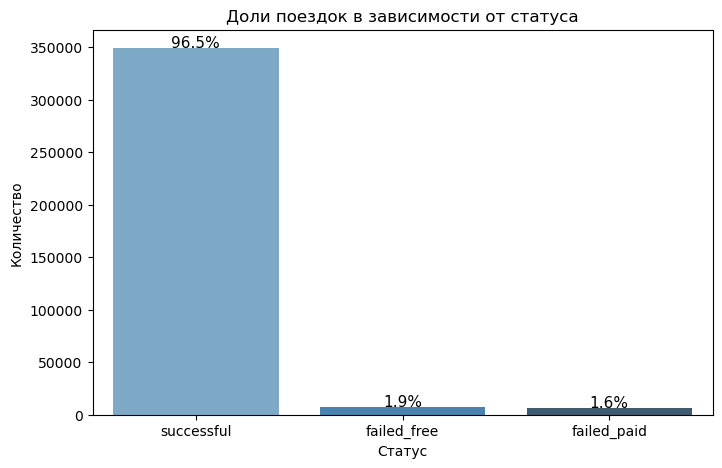

In [ ]:
status_counts = df['status'].value_counts()
total = status_counts.sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")
for i, count in enumerate(status_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Доли поездок в зависимости от статуса')
plt.ylabel('Количество')
plt.xlabel('Статус')
plt.show()

#### Осталось проверить большие значения километража, длительности, стоимости и кешбэка.

Поскольку ранее мы убедились, чтобы кешбэк не превышал стоимость поездки, а также с учетом того, что сервис предлагал в 2024 году высокий кешбэк, в том числе 100%, столь высокие значения кешбэка не являются аномальными и соотносятся с остальными данными, то есть за длительные дорогостоящие поездки - соотвествующий кешбэк.

Также мы уже удалили поездки с аномально высокими значениями километража с помощью условия на скорость. Поэтому поездки на 5 тысяч усл. ден. ед., длительностью более 11 часов и с километражом в несколько десятком км реальные (их немного в данных). И признаки соотносятся между собой: длительные поездки на большую дистанцию дорого стоят и возвращают соответствующий кешбэк.

In [ ]:
df[['age', 'distance_km', 'duration_min', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,361798.0,31.566872,9.451584,18.00,24.000000,31.000000,37.000000,94.000000
distance_km,361798.0,2.251622,2.442365,0.00,0.887722,1.614156,2.821839,79.891783
duration_min,361798.0,11.376989,12.875095,0.03,4.730000,7.750000,13.390000,715.170000
nominal_price_rub_amt,361798.0,126.824382,97.677799,0.00,79.960000,103.880000,141.920000,5627.640000
loyalty_accrual_rub_amt,336632.0,35.079488,66.907572,0.20,11.090000,18.490000,34.370000,3185.000000
loyalty_accrual_bns_amt,17563.0,57.540700,34.283136,1.00,38.000000,59.000000,70.000000,958.000000


In [ ]:
df[df['nominal_price_rub_amt'] > 2000][['activation_cost',
                                        'distance_km',
                                        'speed',
                                        'duration_min',
                                        'nominal_price_rub_amt',
                                        'loyalty_accrual_rub_amt',
                                        'loyalty_accrual_bns_amt']]

In [ ]:
len(df[df['nominal_price_rub_amt'] > 2000])

37

In [ ]:
df[df['loyalty_accrual_bns_amt'] > 800][['activation_cost',
                                        'distance_km',
                                        'speed',
                                        'duration_min',
                                        'nominal_price_rub_amt',
                                        'loyalty_accrual_rub_amt',
                                        'loyalty_accrual_bns_amt']]

,activation_cost,distance_km,speed,duration_min,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
10286,20.0,10.743667,2.576213,250.22,1862.54,NaN,958.00000
65041,50.0,9.389599,6.120990,92.04,886.07,NaN,828.31776


### Обработка пропусков

In [ ]:
np.round(df.isnull().sum() * 100 / len(df), 2)

order_rk                     0.00
party_rk                     0.00
gender_cd                    0.77
age                          0.00
education_level_cd          52.16
marital_status_cd           45.18
lvn_state_nm                 8.66
minute_cost                  0.00
activation_cost              0.00
hold_amount                  0.00
transport_model              0.00
distance_km                  0.00
created_dttm                 0.00
book_start_dttm              0.00
book_end_dttm                0.00
book_time_zone_cd            0.00
local_book_start_dttm        0.00
nominal_price_rub_amt        0.00
loyalty_accrual_rub_amt      6.96
loyalty_accrual_bns_amt     95.15
duration_min                 0.00
start_hour                   0.00
time_of_day                  0.00
weekday_name                 0.00
is_weekend                   0.00
month                        0.00
has_loyalty                  0.00
has_100_percent_cashback     0.00
speed                        0.00
status        

#### Для начала заполним нулями пропуски для кешбэка

In [ ]:
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(0)

#### lvn_state_nm

Пропуски для региона проживания _lvn_state_nm_ заполню наиболее частотными регионами в зависимости от часового пояса. Другими словами если часовой пояс указан, например 3, тогда пропуск региона проживания заполнится самым частотным регионом для данного часового пояса, в данном примере -- "Г МОСКВА".

Заметим, что часовые пояса в России охватывают от UTC+2 до UTC+12. Поэтому также исправим данные, связанные с часовым поясом и временем, где указан часовой пояс UTC 0 и UTC+1, на UTC+2.

In [ ]:
df['book_time_zone_cd'].unique()

array([ 5,  3,  7,  8,  6, 11,  2,  4, 10,  9, 12,  1,  0], dtype=int64)

In [ ]:
df.groupby('book_time_zone_cd')['lvn_state_nm'].value_counts().loc[4]

lvn_state_nm
РЕСП УДМУРТСКАЯ      3969
ОБЛ САМАРСКАЯ        3284
ОБЛ САРАТОВСКАЯ      2539
ОБЛ АСТРАХАНСКАЯ      710
Г МОСКВА              234
                     ... 
ОБЛ ТУЛЬСКАЯ            1
ОБЛ ТАМБОВСКАЯ          1
ОБЛ НОВОСИБИРСКАЯ       1
ОБЛ КАЛУЖСКАЯ           1
КРАЙ КАМЧАТСКИЙ         1
Name: count, Length: 61, dtype: int64

In [ ]:
from datetime import timedelta

# исправляем book_time_zone_cd (часовой пояс) на 2
df.loc[df['book_time_zone_cd'].isin([0, 1]), 'book_time_zone_cd'] = 2

# пересчитаем local_book_start_dttm (местное время бронирования), разница с Московским временем -1 час
df.loc[df['book_time_zone_cd'] == 2, 'local_book_start_dttm'] = df.loc[df['book_time_zone_cd'] == 2, 'book_start_dttm'] - timedelta(hours=1)

# пересчитаем start_hour (час начала поездки) из обновленного local_book_start_dttm
df['start_hour'] = pd.to_datetime(df['local_book_start_dttm']).dt.hour

# заново найдем время суток
df['time_of_day'] = df['start_hour'].apply(get_time_of_day)

In [ ]:
def most_common_region_by_timezone(dataframe):
    result = {}
    for i in range(2, 13):
        try:
            most_common_region = df.groupby('book_time_zone_cd')['lvn_state_nm'].value_counts().loc[i].index[0]
            result[i] = most_common_region
        except KeyError:
            result[i] = None
    return result

region_dict = most_common_region_by_timezone(df)
print(region_dict)

{2: 'ОБЛ КАЛИНИНГРАДСКАЯ', 3: 'Г МОСКВА', 4: 'РЕСП УДМУРТСКАЯ', 5: 'ОБЛ СВЕРДЛОВСКАЯ', 6: 'Г МОСКВА', 7: 'ОБЛ НОВОСИБИРСКАЯ', 8: 'ОБЛ ИРКУТСКАЯ', 9: 'КРАЙ ЗАБАЙКАЛЬСКИЙ', 10: 'КРАЙ ПРИМОРСКИЙ', 11: 'ОБЛ САХАЛИНСКАЯ', 12: 'КРАЙ КАМЧАТСКИЙ'}


In [ ]:
# исправим часовой пояс UTC+6 с Москвы на Омскую область

region_dict[6] = 'ОБЛ ОМСКАЯ'

Наконец, заполним пропуски региона проживания самыми популярными регионами в данном часовом поясе

In [ ]:
df['lvn_state_nm'] = df.apply(lambda row: region_dict[row['book_time_zone_cd']] if pd.isna(row['lvn_state_nm']) else row['lvn_state_nm'], axis=1)

In [ ]:
len(df[(df['book_time_zone_cd'] == 0) | (df['book_time_zone_cd'] == 1)])

0

#### Заполним пропуски в колонке для пола gender_cd наиболее распространенным значением

Поскольку пропусков  мало, наши изменения почти не повлияют на описательные статистики и графики.

In [ ]:
df['gender_cd'].mode()

0    M
Name: gender_cd, dtype: object

In [ ]:
df['gender_cd'] = df['gender_cd'].fillna(df['gender_cd'].mode()[0])

#### education_level_cd и marital_status_cd

**Пропуски остались только в колонках уровень образования education_level_cd и семейное положение marital_status_cd.** Их очень много, поэтому мы не сможем их адекватно заполнить, колонки удалять так же не будем. По нашему мнению, данные колонки не будут полезны в дальнейшем анализе, поэтому сейчас мы оставим данные пропуски как есть. При необходимости в дальнейшем заполним их значением "Неизвестно".

In [ ]:
np.round(df.isnull().sum() * 100 / len(df), 2)

order_rk                     0.00
party_rk                     0.00
gender_cd                    0.00
age                          0.00
education_level_cd          52.16
marital_status_cd           45.18
lvn_state_nm                 0.00
minute_cost                  0.00
activation_cost              0.00
hold_amount                  0.00
transport_model              0.00
distance_km                  0.00
created_dttm                 0.00
book_start_dttm              0.00
book_end_dttm                0.00
book_time_zone_cd            0.00
local_book_start_dttm        0.00
nominal_price_rub_amt        0.00
loyalty_accrual_rub_amt      0.00
loyalty_accrual_bns_amt      0.00
duration_min                 0.00
start_hour                   0.00
time_of_day                  0.00
weekday_name                 0.00
is_weekend                   0.00
month                        0.00
has_loyalty                  0.00
has_100_percent_cashback     0.00
speed                        0.00
status        

### Feature engineering

Ранее мы уже добавили несколько новых признаков на основе существующих:
* 'duration_min' - длитедьность поездки в минутах
* 'start_hour' - час начала поездки
* 'time_of_day' - время суток, когда совершалась поездка (ночь, утро, день, вечер)
* 'weekday_name' - день недели совершения поездки
* 'is_weekend' - флаг для выходного дня
* 'month' - месяц совершения поездки
* 'has_loyalty' - начислялся ли кешбэк
* 'has_100_percent_cashback' - начислялся ли 100% кешбэк в рамках акции на первую поездку в сервисе
* 'speed' - средняя скорость в км/ч
* 'status' - статус поездки (failed_free, failed_paid, successful)

#### Создание флага для поминутного тарифа _is_per_minute_rate_

Мы выяснили, что у сервиса кикшеринга существует поминутный тариф, а также другие - 30 минут, 60 минут, 120 минут, пока не сядет. Мы хотим разделить все данные на две большие группы: поминутный тариф и не поминутный.

Исходя из данных, стоимость поездки для поминутного тарифа вычисляется как длительность поездки в минутах, округленная вверх, умноженная на стоимость минуты, + стоимость активации поездки. Создадим таким образом колонку с ожидаемой стоимостью поездки при поминутном тарифе. Далее если фактическая и ожидаемая стоимости не совпадут, значит, поездка осуществлялась не по минутному тарифу. Исходя из этого, создадим флаг для поминутного тарифа.

In [ ]:
df[['duration_min', 'minute_cost', 'activation_cost', 'nominal_price_rub_amt']].head()

,duration_min,minute_cost,activation_cost,nominal_price_rub_amt
0,20.50,4.99,30.0,134.79
1,6.91,8.49,50.0,109.43
2,6.84,5.99,30.0,71.93
3,2.31,8.99,50.0,76.97
4,10.09,6.99,50.0,126.89


In [ ]:
# вычисляем ожидаемую цену
df['expected_price'] = np.ceil(df['duration_min']) * df['minute_cost'] + df['activation_cost']

In [ ]:
# создаем флаг для поминутного тарифа
df['is_per_minute_rate'] = df.apply(lambda row: 1 if row['nominal_price_rub_amt'] == row['expected_price'] else 0, axis=1)

In [ ]:
df['is_per_minute_rate'].value_counts()

is_per_minute_rate
1    277846
0     83952
Name: count, dtype: int64

#### Создание возрастных групп _age_group_

Разделим всех пользователей на возрастные группы:
- 18-24 - молодые люди, возраст студентов
- 25-35 - остальная молодежь
- 36-50 - средний возраст
- 50+ - старший возраст

Обращаем внимание, что названия условные, под группой "студенты" имеем в виду, что в этой возрастной группе преобладают студенты, но это необязательно.

In [ ]:
def age_group(age):
    if age <= 24:
        return 'студенты 18-24'
    elif age <= 35:
        return 'старшая молодежь 25-35'
    elif age <=50:
        return 'средний возраст 36-50'
    else:
        return 'старший возраст и пожилые 50+'

df['age_group'] = df['age'].apply(age_group)

### Выводы по первой части EDA - подготовка данных

Итак, мы наконец подготовили данные к более глубокому анализу: проверили их на наличие дубликатов, обработали пропуски и выбросы, привели признаки к нужным форматам данных, разобрались с аномалиями и ошибками в данных, сконструировали дополнительные признаки. Ниже сформулированы некоторые **промежуточные выводы и замечания по аномальным данным**.

#### Аномалии и качество данных

1. Около 2% поездок имели **завышенный кешбэк, который превышал стоимость поездки**. Возможно, это лишь ошибки в данных, либо же кешбэк действительно был выше стоимости поездки из-за багов сервиса.
2. Несмотря на то, что Т-банк утверждает, что поездки на самокатах доступны только совершеннолетним лицам, в датасете есть **незначительное количество поездок, которые осуществились несовершеннолетными**. Ошибка либо в самих данных, либо в том, что подростки также могут воспольpоваться самокатом и оплатить поездку со своей карты.
3. Почти у 7% поездок мы обнаружили **завышенные значения километража и/или скорости**. Известно, что в 2024 году ограничение на максимальную скорость самокатов составляло 25 км/ч. Однако у большого количества самокатов скорости были выше этого значения. Конечно, это может быть связано с неправильным определением километража телефоном/самокатом, либо же программные ограничения на скорость самокатов не работали должным образом.
4. **В 3,5% поездках пользователи испытали негативный опыт и по каким-то причинам быстро завершили поездку, при этом почти за половину таких неудавшихся поездок были списаны денежные средства**. Также нашлись **поездки, которые, судя по данным, формально состоялись (длились несколько минут, и было проехано несколько сот метров), но за которые не были списаны деньги**. То есть правила оплаты поездок довольно беспорядочные, мы так и не смогли определить условия, когда поездка считается состоявшейся (за которую нужно списать деньги), а когда нет.
5. Также отметим совсем небольшое количество строк (около 11), в которых кешбэк был отрицательным, а также где кешбэк был якобы выплачен баллами и денежными единицами (что означало бы одновременную оплату дебетовой и кредитной картами). Но таких данных незначительное количество, поэтому мы это списываем на ошибки в данных.

## Анализ и визуализация данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361798 entries, 0 to 396748
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_rk                  361798 non-null  int64         
 1   party_rk                  361798 non-null  int64         
 2   gender_cd                 361798 non-null  object        
 3   age                       361798 non-null  int64         
 4   education_level_cd        173069 non-null  object        
 5   marital_status_cd         198344 non-null  object        
 6   lvn_state_nm              361798 non-null  object        
 7   minute_cost               361798 non-null  float64       
 8   activation_cost           361798 non-null  float64       
 9   hold_amount               361798 non-null  float64       
 10  transport_model           361798 non-null  object        
 11  distance_km               361798 non-null  float64       
 12  created

### Для начала посмотрим на корреляцию числовых признаков

Ожидаемо, между километражем (расстоянием) и длительностью поездки сильная положительная корреляция, а также между километражем и стоимостью. Но в остальном между числовыми признаками нет сильных корреляций.

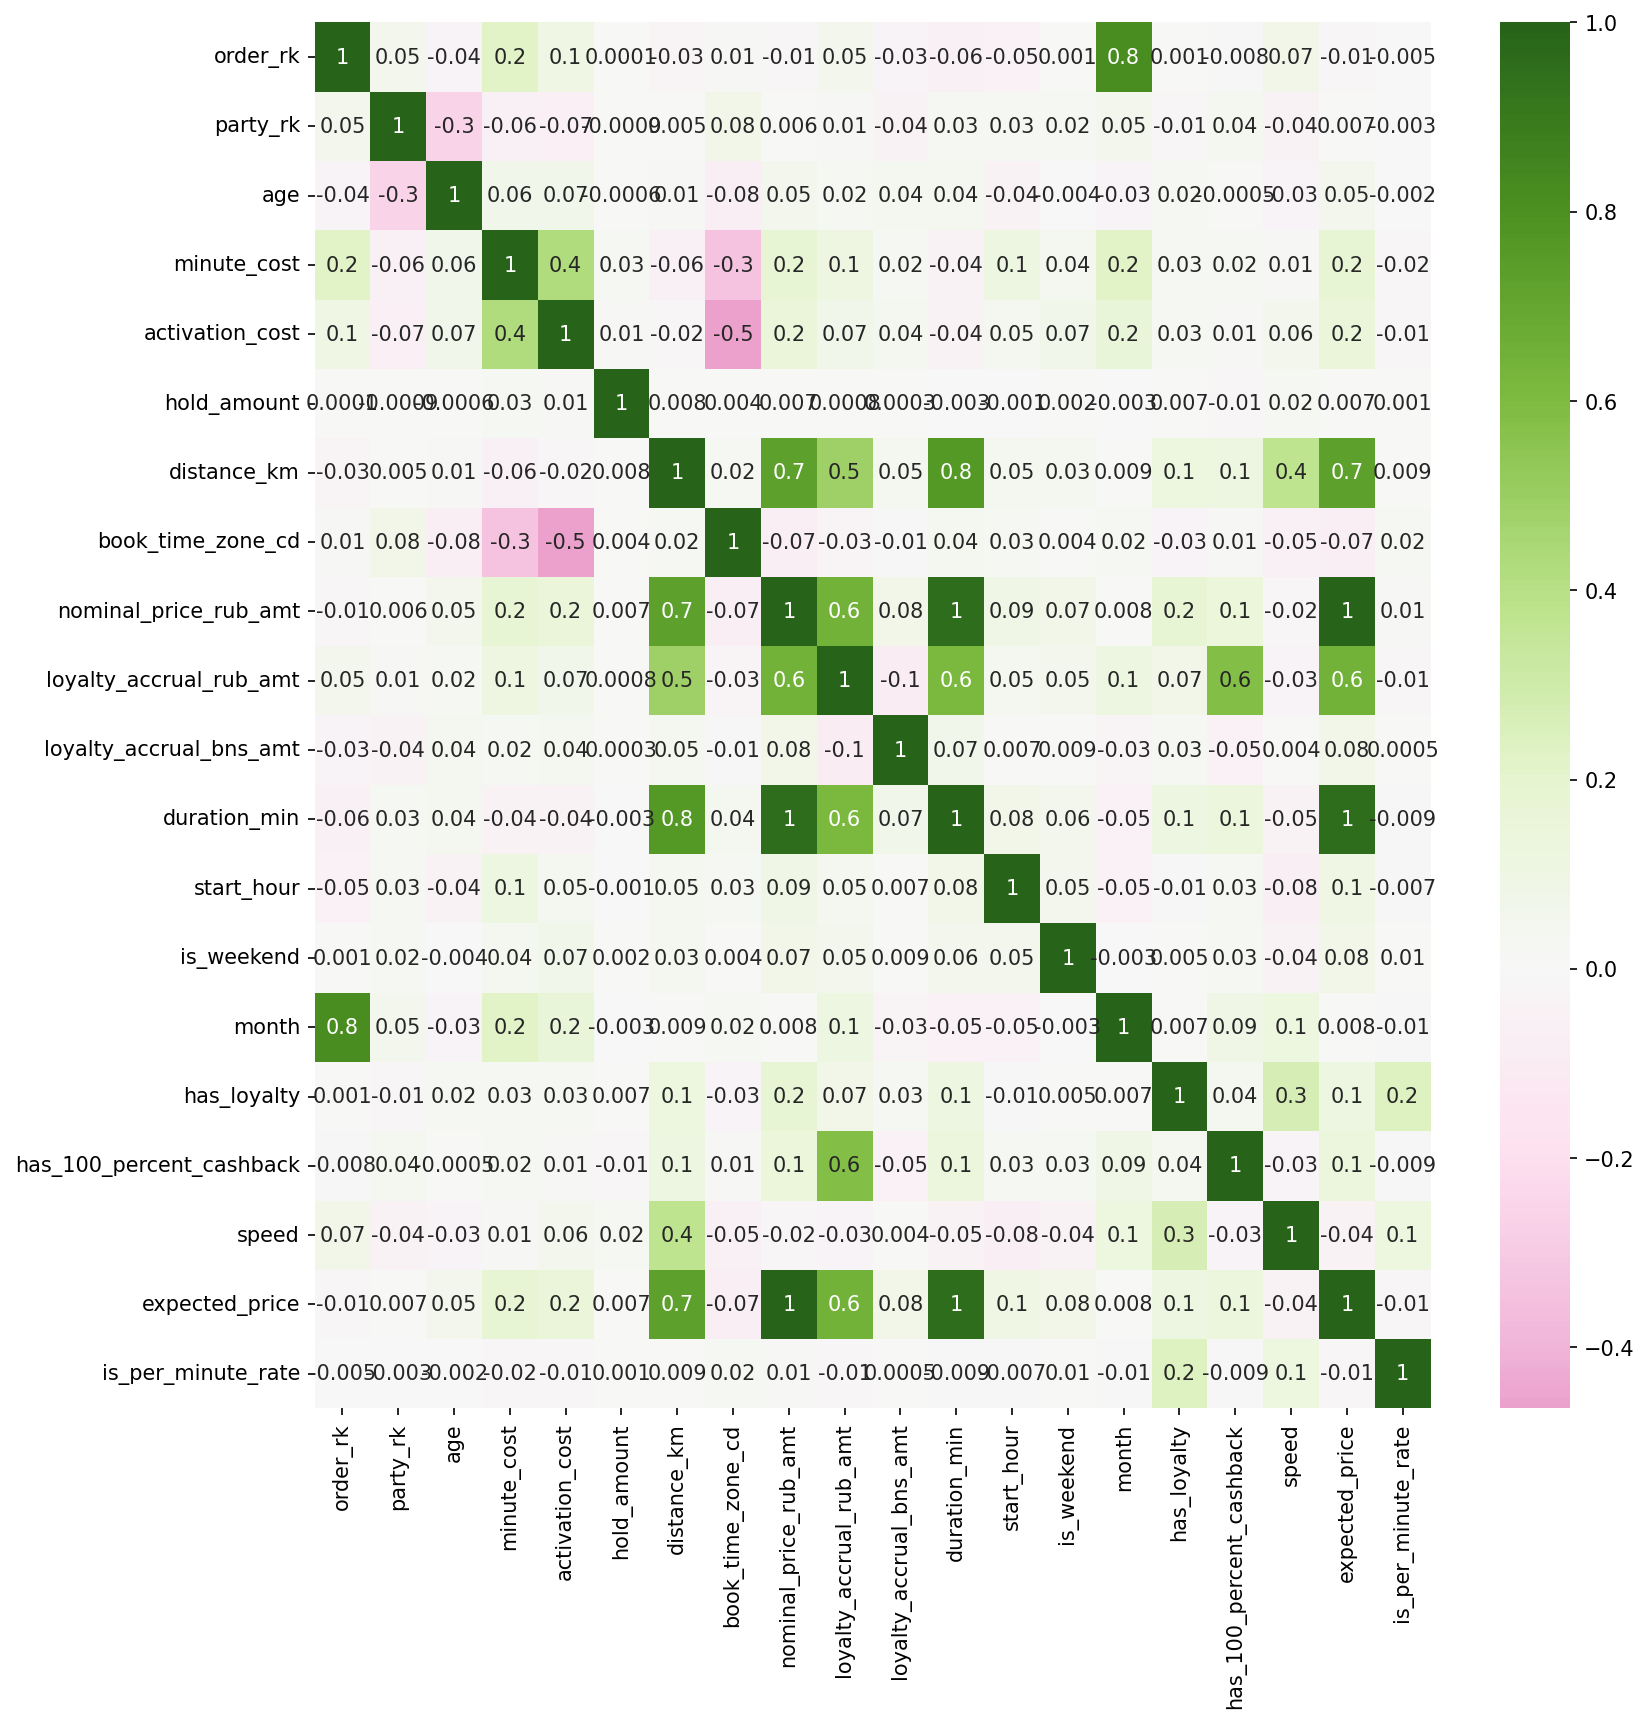

In [ ]:
plt.figure(figsize=(12,12), dpi=150)
sns.heatmap(df.corr(numeric_only=True), cmap='PiYG', center=0, annot=True, fmt='.1g');

### План анализа

Опишем основные аспекты анализа, которые помогут лучше понять данные и сформулировать по ним выводы и продуктовые гипотезы:
1. Активность пользователей: динамика объема поездок по месяцам, времени; когда преимущественно совершаются поездки: день недели, будний/выходной день, время суток (утро/день/вечер/ночь)
2. Характеристики поездок: на какие дистанции в основном ездят; какая средняя скорость; сколько времени длятся большинство поездок
3. Тарификация и стоимость: какие типы тарифов предпочитают - поминутный или другие; какая в среднем стоимость минуты поездки и стоимость активации
4. Неудавшиеся поездки: доля, возможные причины
5. Доля поездок с кешбэком, какой тип кешбэка (деньги / баллы) преобладает
6. Возвращаемость, retention (удержание): доли пользователей с одной поездкой и многими; распределение пользователей по количеству успешных поездок, добавление флага для лояльных пользователей; cреднее число поездок на пользователя; как первый опыт (наличие кешбэка, акция 100% кешбэка на первую поездку, неудача) влияет на возвращаемость; Cohort Retention Rate (коэффициент удержания по когортам)
7. Профиль пользователей: пол, возраст, образование, семейное положение. Сравнение портретов лояльных пользователей с остальными.
8. География: регионы-лидеры по числу пользователей оттуда и популярные регионы по часовым поясам
9. Доходность: каков доход с поездок, средний, медианный доход за одну поездку, ARPU, ARPPU. Общий и средний доход в зависимости от времени суток, дней недели и возрастной группы

### 1. Активность пользователей: динамика объема поездок по месяцам, времени; когда преимущественно совершаются поездки: день недели, будний/выходной день, время суток (утро/день/вечер/ночь)

#### Динамика объема поездок по месяцам

In [ ]:
monthly_data = df.groupby('month').size().reset_index(name='Количество поездок')

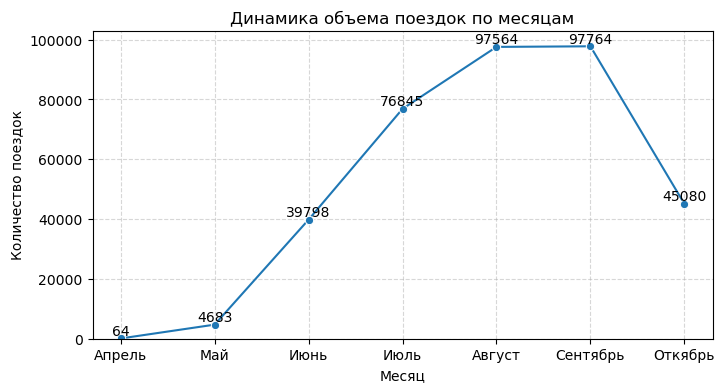

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(monthly_data, x='month', y='Количество поездок', marker='o')

plt.title('Динамика объема поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.ylim(0, 103_000)
plt.xticks(ticks=range(4, 11), labels=['Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Откябрь'])

for i in range(len(monthly_data)):
    plt.text(monthly_data['month'][i], monthly_data['Количество поездок'][i] + 100,
             str(monthly_data['Количество поездок'][i]), ha='center', va='bottom', fontsize=10)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [ ]:
min_date = df['created_dttm'].dt.date.min()
max_date = df['created_dttm'].dt.date.max()
print(f'Период поездок: {min_date} - {max_date}')

Период поездок: 2024-04-10 - 2024-10-21


#### Динамика объема поездок по часам

In [ ]:
hour_data = df.groupby('start_hour').size().reset_index(name='Количество поездок')

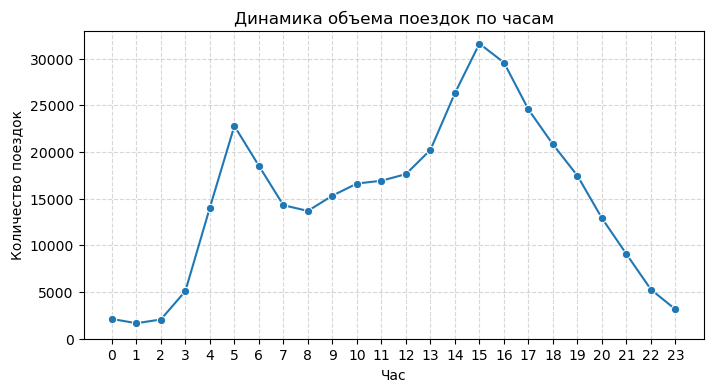

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(hour_data, x='start_hour', y='Количество поездок', marker='o')

plt.title('Динамика объема поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.ylim(0, 33000)
plt.xticks(ticks=range(24), labels=range(24))
plt.grid(linestyle='--', alpha=0.5)
plt.show()

#### Время суток (утро/день/вечер/ночь), в которое совершались поездки

In [ ]:
time_of_day_data = df.groupby('time_of_day').size().reset_index(name='Количество поездок')
time_of_day_data['time_of_day'] = pd.Categorical(time_of_day_data['time_of_day'], categories=['ночь 0-6', 'утро 6-11', 'день 11-17', 'вечер 17-24'], ordered=True)
time_of_day_data = time_of_day_data.sort_values('time_of_day')

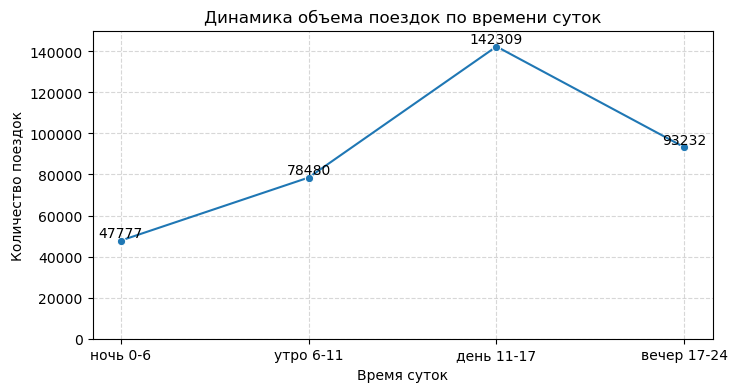

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(time_of_day_data, x='time_of_day', y='Количество поездок', marker='o')

plt.title('Динамика объема поездок по времени суток')
plt.xlabel('Время суток')
plt.ylabel('Количество поездок')
plt.ylim(0, 150000)
plt.xticks(ticks=range(4), labels=['ночь 0-6', 'утро 6-11', 'день 11-17', 'вечер 17-24'])

for i in range(len(time_of_day_data)):
    plt.text(time_of_day_data['time_of_day'][i], time_of_day_data['Количество поездок'][i] + 100,
             str(time_of_day_data['Количество поездок'][i]), ha='center', va='bottom', fontsize=10)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

#### Динамика объема поездок по дням недели

In [ ]:
weekday_data = df.groupby('weekday_name').size().reset_index(name='Количество поездок')
weekday_data['weekday_name'] = pd.Categorical(weekday_data['weekday_name'],
                                             categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                             ordered=True)
weekday_data = weekday_data.sort_values('weekday_name')

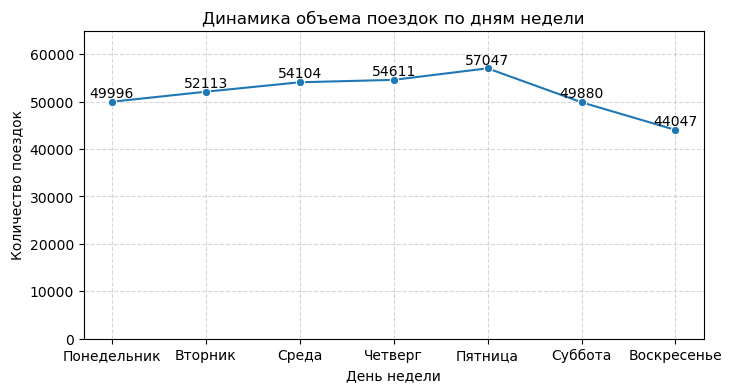

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(weekday_data, x='weekday_name', y='Количество поездок', marker='o')

plt.title('Динамика объема поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.ylim(0, 65000)
plt.xticks(ticks=range(7), labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

for i in range(len(weekday_data)):
    plt.text(weekday_data['weekday_name'][i], weekday_data['Количество поездок'][i] + 300,
             str(weekday_data['Количество поездок'][i]), ha='center', va='bottom', fontsize=10)

plt.grid(linestyle='--', alpha=0.5)
plt.show()

#### Доли поездок в будние и выходные дни

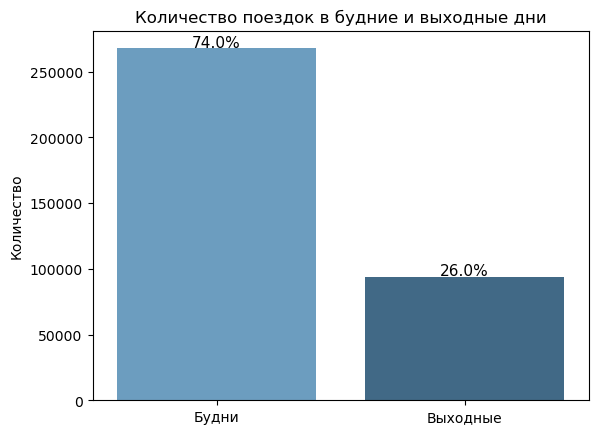

In [ ]:
is_weekend_counts = df['is_weekend'].value_counts()
total = is_weekend_counts.sum()

sns.barplot(x=is_weekend_counts.index, y=is_weekend_counts.values, palette="Blues_d")

for i, count in enumerate(is_weekend_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в будние и выходные дни')
plt.ylabel('Количество')
plt.xlabel('')
plt.xticks(ticks=range(2), labels=['Будни', 'Выходные'])
plt.show()

#### Выводы по времени активности пользователей

1. Данные охватывают сезон аренды самокатов 2024 года: 2024-04-10 - 2024-10-21. Данный сервис появился у Т-банка только в прошлом году, а новости о нем - в июне 2024 года, поэтому именно в июне, а не ранее с началом сезона, резко выросли объемы поездок. Похоже обзоры и новости о новом сервисе, а также акции, включающие высокий кешбэк и скидки, поспособствовали росту числа поездок в июле. Так, **самый высокий спрос наблюдался в августе и сентябре**, достигнув 97 тысяч поездок в месяц. В октябре, с наступлением холодов на большей части территории страны, произошел резкий спад. Также в октябре закончились акции. И в целом это конец сезона для кикшеринга.
2. Интерес к самокатам мало зависит от дня недели, но всё-таки в будние дни количество поездок немного больше, чем в выходные. Скорее всего это связано с тем, что **самокаты используют в качестве транспорта до работы/учебы и обратно**. А наибольшее число поездок - в преддверии выходных, в пятницу.
3. **Пики спроса на самокаты приходятся на раннее утро (5 часов) и послеобеденное время (15 часов).** Высокий спрос ранним утром связан со временем, в которое люди едут на работу и учебу.

### 2. Характеристики поездок: на какие дистанции в основном ездят; какая средняя скорость; сколько времени длятся большинство поездок

В этом пункте учитываем только "успешные" (состоявшиеся) поездки, а неудачные исключаем.

#### Дистанция, расстояние

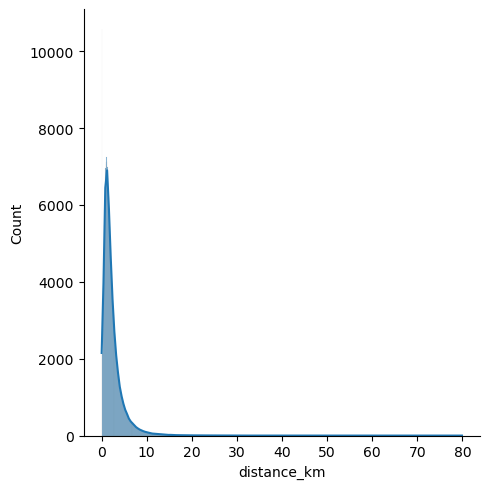

In [ ]:
sns.displot(df[df['status'] == 'successful']['distance_km'], kde=True);

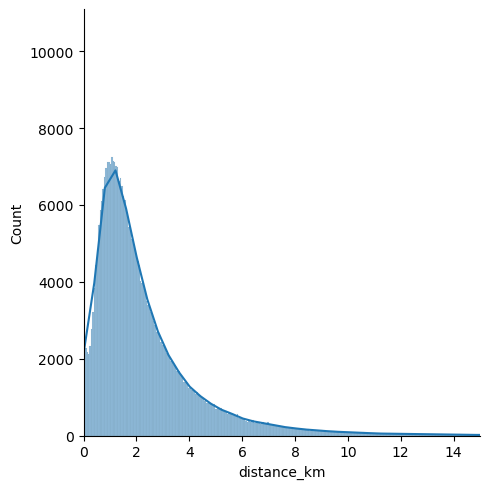

In [ ]:
sns.displot(df[df['status'] == 'successful']['distance_km'], kde=True)
plt.xlim(0,15);

In [ ]:
df[df['status'] == 'successful']['distance_km'].agg(['mean', 'median'])

mean      2.332699
median    1.673687
Name: distance_km, dtype: float64

In [ ]:
def type_distance(distance):
    if distance <= 1:
        return 'очень короткая до 1 км'
    elif distance <=3:
        return 'короткая 1-3 км'
    elif distance <=10:
        return 'средняя 3-10 км'
    else:
        return 'длинная 10+ км'

df['type_distance'] = df['distance_km'].apply(type_distance)

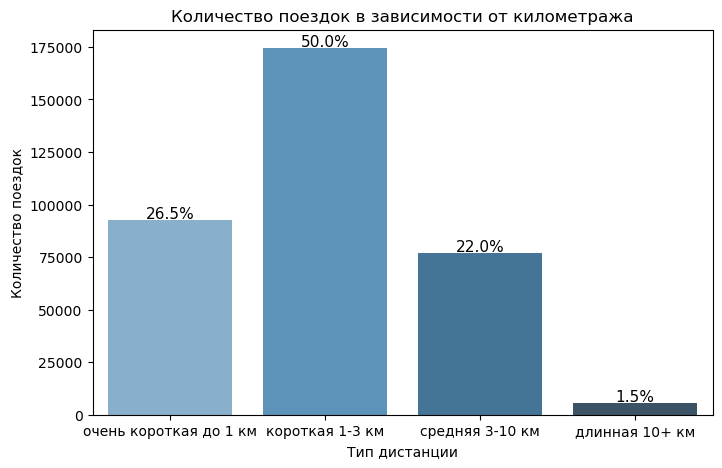

In [ ]:
type_distance_counts = df[df['status'] == 'successful']['type_distance'].value_counts().reindex(['очень короткая до 1 км', 'короткая 1-3 км', 'средняя 3-10 км', 'длинная 10+ км'])
total = type_distance_counts.sum()

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df[df['status'] == 'successful'],
    x='type_distance',
    order=['очень короткая до 1 км', 'короткая 1-3 км', 'средняя 3-10 км', 'длинная 10+ км'],
    palette="Blues_d"
)

for i, count in enumerate(type_distance_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от километража')
plt.xlabel('Тип дистанции')
plt.ylabel('Количество поездок')
plt.show()

#### Скорость

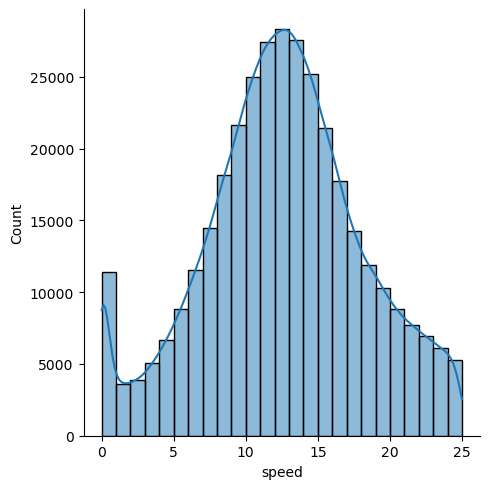

In [ ]:
sns.displot(df[df['status'] == 'successful']['speed'], bins=25, kde=True);

In [ ]:
df[df['status'] == 'successful']['speed'].agg(['mean', 'median'])

mean      12.590642
median    12.600004
Name: speed, dtype: float64

#### Длительность

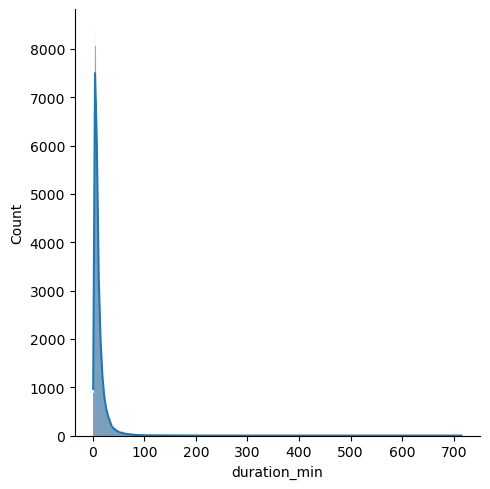

In [ ]:
sns.displot(df[df['status'] == 'successful']['duration_min'], kde=True);

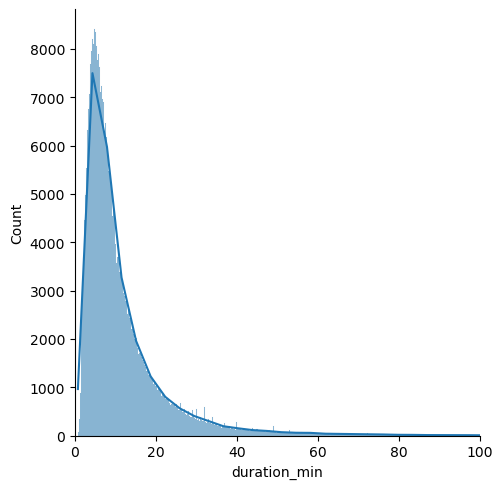

In [ ]:
sns.displot(df[df['status'] == 'successful']['duration_min'], kde=True)
plt.xlim(0,100);

In [ ]:
df[df['status'] == 'successful']['duration_min'].agg(['mean', 'median'])

mean      11.757837
median     8.010000
Name: duration_min, dtype: float64

In [ ]:
def type_duration(duration):
    if duration < 30:
        return 'до получаса'
    elif duration < 60:
        return 'до 1 часа'
    elif duration < 120:
        return 'до 2 часов'
    else:
        return 'дольше 2 часов'

df['type_duration'] = df['duration_min'].apply(type_duration)

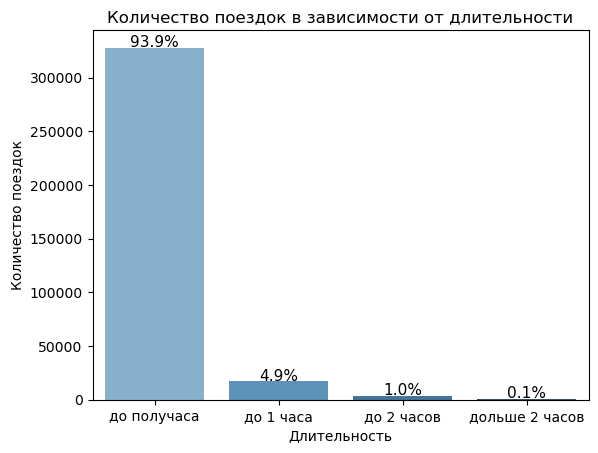

In [ ]:
type_duration_counts = df[df['status'] == 'successful']['type_duration'].value_counts().reindex(['до получаса', 'до 1 часа', 'до 2 часов', 'дольше 2 часов'])
total = type_duration_counts.sum()

sns.countplot(
    data=df[df['status'] == 'successful'],
    x='type_duration',
    order=['до получаса', 'до 1 часа', 'до 2 часов', 'дольше 2 часов'],
    palette="Blues_d"
)

for i, count in enumerate(type_duration_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.show()

#### Выводы по характеристикам поездок

1. **Половина всех поездок осуществляется на короткие дистанции 1-3 км**, около четверти поездок совершается на очень короткие дистанции до 1 км, незначительная доля поездок приходится на длинные дистанции больше 10 км.
2. **Распределение средних значений скоростей имеет распределение, близкое к нормальному.** Так, средняя и медианная скорости составляют 12,6 км/ч.
3. **Абсолютное большинство (94%) совершаемых поездок длится не дольше получаса.** Практически никто не использует самокат дольше 2 часов.

### 3. Тарификация и стоимость: какие типы тарифов предпочитают - поминутный или другие; какая в среднем стоимость минуты поездки и стоимость активации

#### Предпочтения тарифов - поминутный Vs. другие

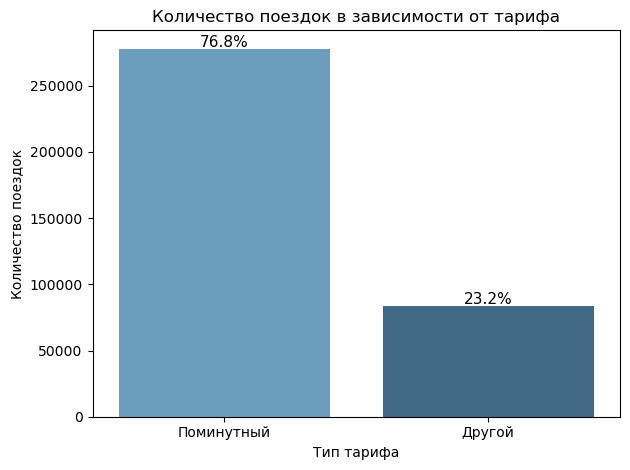

In [ ]:
type_tariff_counts = df['is_per_minute_rate'].value_counts()
total = type_tariff_counts.sum()

sns.countplot(
    data=df,
    x='is_per_minute_rate',
    order=[1, 0],
    palette="Blues_d"
)

for i, count in enumerate(type_tariff_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от тарифа')
plt.xlabel('Тип тарифа')
plt.ylabel('Количество поездок')
plt.xticks(ticks=range(2), labels=['Поминутный', 'Другой'])
plt.tight_layout()
plt.show()

#### Стоимость минуты и стоимость активации

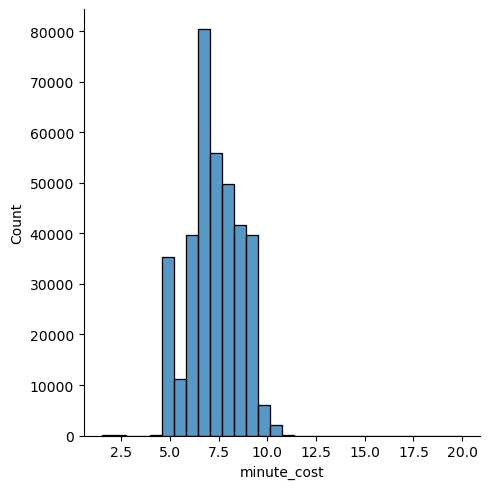

In [ ]:
# стоимость минуты
sns.displot(df['minute_cost'], bins=30);

In [ ]:
df['minute_cost'].describe()

count    361798.000000
mean          7.279775
std           1.295887
min           1.500000
25%           6.490000
50%           7.490000
75%           8.250000
max          19.990000
Name: minute_cost, dtype: float64

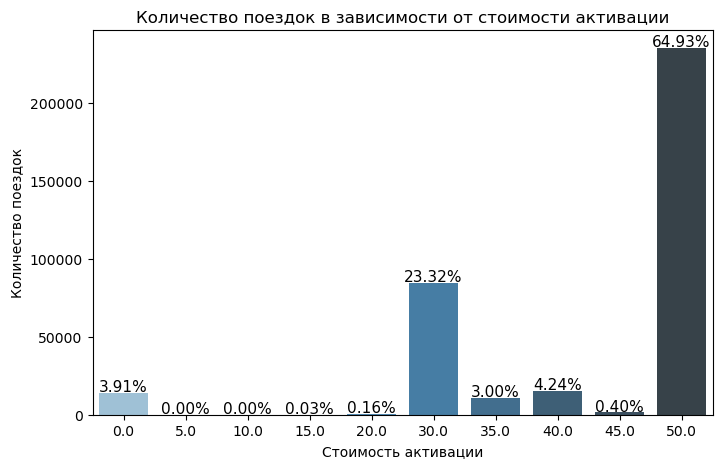

In [ ]:
plt.figure(figsize=(8, 5))

activation_cost_counts = df['activation_cost'].value_counts().sort_index()
total = activation_cost_counts.sum()
order = activation_cost_counts.index

sns.countplot(data=df, x='activation_cost', order=order, palette="Blues_d")

for i, count in enumerate(activation_cost_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.2f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от стоимости активации')
plt.xlabel('Стоимость активации')
plt.ylabel('Количество поездок')
plt.show()

#### Выводы по тарификации и стоимости

1. **Три четверти (76,8%) поездок совершаются по поминутному тарифу.**
2. **Медианная стоимость минуты поездки составляет 7,49 усл. ден. ед.**
3. **Для большинства поездок стоимость активации составляет 50 усл. ден. ед. - это максимальная сумма**, у четверти поездок стоимость активации - 30 усл. ден. ед.

### 4. Неудавшиеся поездки: доля, возможные причины

Напомним, что в нашем исследовании мы считаем поездку неудачной, если было проехано меньше 100 метров и поездка длилась меньше 1.5 минуты. При этом в зависимости от оплаты мы добавили статус поездки в датасет следующим образом:

* неудачная поездка, оплата прошла _failed_paid_
* неудачная поездка, оплата не прошла _failed_free_
* состоявшаяся поездка с оплатой _successful_

Мы это сделали, чтобы исследовать негативный пользовательский опыт. Важно понять, возвращаются ли пользователи в сервис после неудавшейся поездки, за которую еще могли списать деньги. Важно определить и проблему отмены или бага. Возможно, проблема в конкретной модели самоката/локации/времени поездки.

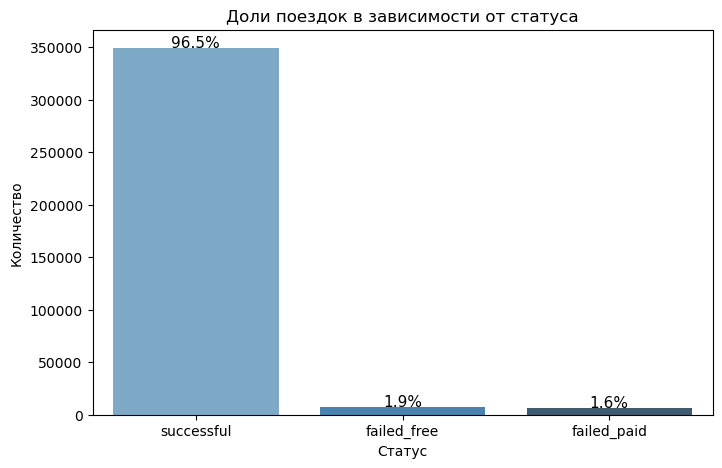

In [ ]:
status_counts = df['status'].value_counts()
total = status_counts.sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")

for i, count in enumerate(status_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Доли поездок в зависимости от статуса')
plt.ylabel('Количество')
plt.xlabel('Статус')
plt.show()

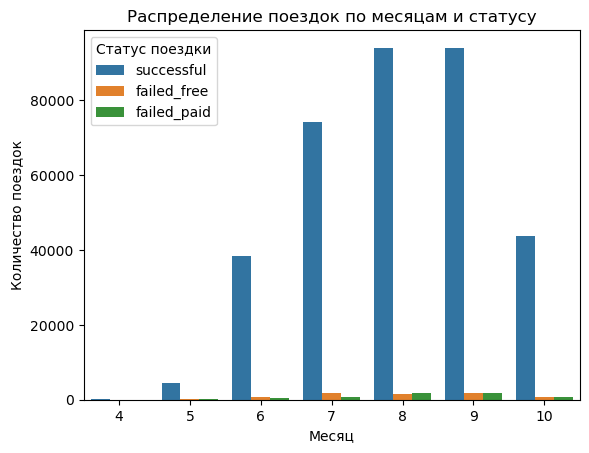

In [ ]:
sns.countplot(data=df, x='month', hue='status', order=[4, 5, 6, 7, 8, 9, 10])

plt.title('Распределение поездок по месяцам и статусу')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.legend(title='Статус поездки')
plt.show()

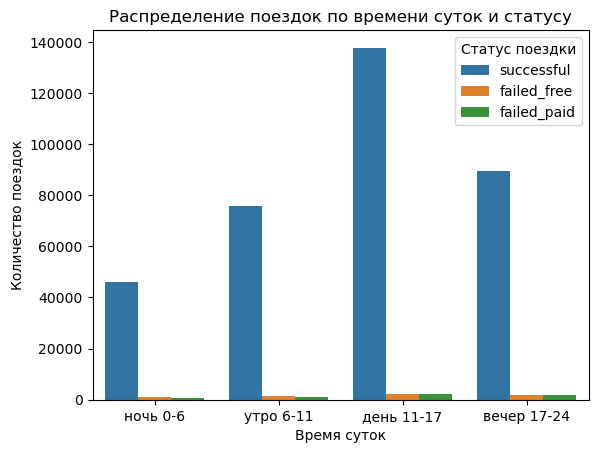

In [ ]:
sns.countplot(data=df, x='time_of_day', hue='status', order=['ночь 0-6', 'утро 6-11', 'день 11-17', 'вечер 17-24'])
plt.title('Распределение поездок по времени суток и статусу')
plt.xlabel('Время суток')
plt.ylabel('Количество поездок')
plt.legend(title='Статус поездки')
plt.show()

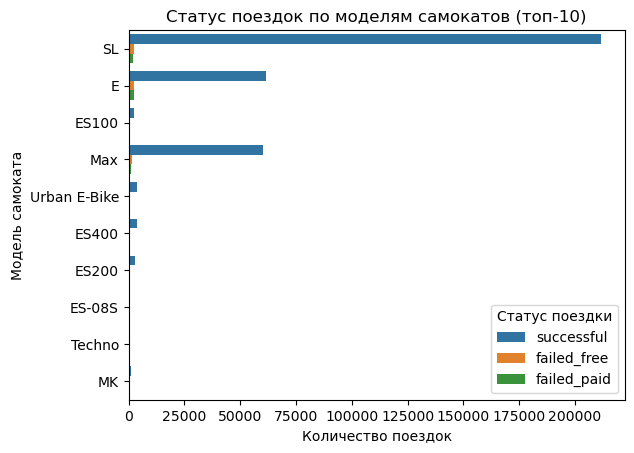

In [ ]:
top_models = df['transport_model'].value_counts().head(10).index
sns.countplot(data=df[df['transport_model'].isin(top_models)], y='transport_model', hue='status')
plt.title('Статус поездок по моделям самокатов (топ-10)')
plt.xlabel('Количество поездок')
plt.ylabel('Модель самоката')
plt.legend(title='Статус поездки', loc=4)
plt.show()

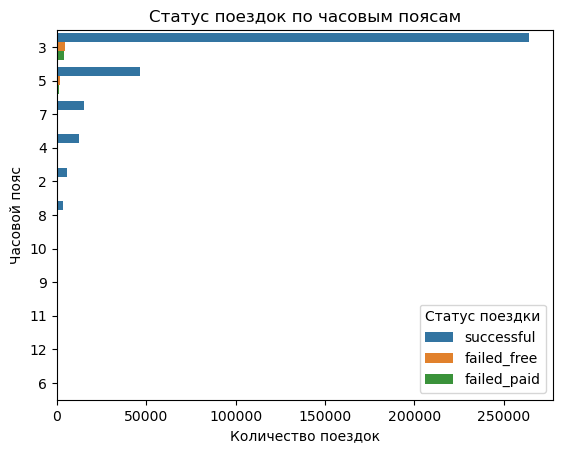

In [ ]:
top_tz = df['book_time_zone_cd'].value_counts().index
sns.countplot(data=df[df['book_time_zone_cd'].isin(top_tz)], y='book_time_zone_cd', hue='status', order=top_tz)
plt.title('Статус поездок по часовым поясам')
plt.xlabel('Количество поездок')
plt.ylabel('Часовой пояс')
plt.legend(title='Статус поездки', loc=4)
plt.show()

#### Выводы по неудавшимся поездкам

1. **В 3,5% поездках пользователи испытали негативный опыт и по каким-то причинам быстро отменили поездку, при этом почти за половину таких неудавшихся поездок были списаны денежные средства.**
2. Связи с моделью самоката, временем суток, месяцем, локацией обнаружить не удалось. Похоже, это не какая-то закономерность, а **случайные события**.
3. **Для решения этой проблемы можно рассмотреть внедрение компенсаций и улучшение поддержки пользователей, столкнувшихся с неудачной поездкой.**

### 5. Доля поездок с кешбэком, какой тип кешбэка (деньги / баллы) преобладает

#### Доли поездок с кешбэком

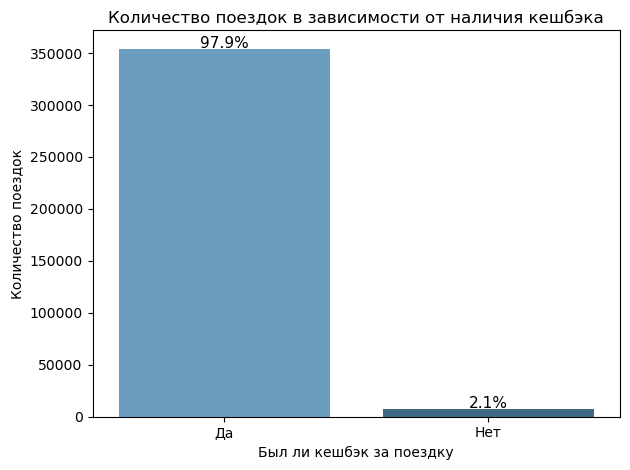

In [ ]:
loyalty_counts = df['has_loyalty'].value_counts()
total = loyalty_counts.sum()

sns.countplot(data=df, x='has_loyalty', order=[1, 0], palette="Blues_d")

for i, count in enumerate(loyalty_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от наличия кешбэка')
plt.xlabel('Был ли кешбэк за поездку')
plt.ylabel('Количество поездок')
plt.xticks(ticks=range(2), labels=['Да', 'Нет'])
plt.tight_layout()
plt.show()

#### Какой тип кешбэка (в баллах, в деньгах) преобладает

In [ ]:
def loyalty_type(row):
    if row['loyalty_accrual_rub_amt'] > 0:
        return 'деньги'
    elif row['loyalty_accrual_bns_amt'] > 0:
        return 'баллы'
    else:
        return 'нет кешбэка'

df['loyalty_type'] = df.apply(loyalty_type, axis=1)

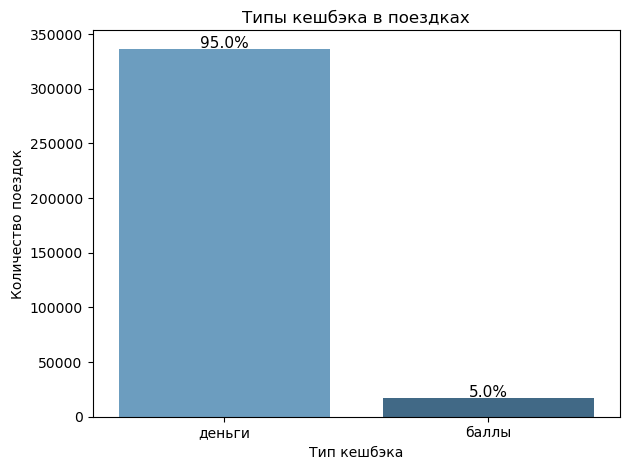

In [ ]:
loyalty_df = df[df['loyalty_type'] != 'нет кешбэка']
loyalty_counts = loyalty_df['loyalty_type'].value_counts()
total = loyalty_counts.sum()

sns.countplot(data=loyalty_df, x='loyalty_type', order=['деньги', 'баллы'], palette="Blues_d")

for i, count in enumerate(loyalty_counts.loc[['деньги', 'баллы']]):
    percent = 100 * count / total
    plt.text(i, count + 500, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Типы кешбэка в поездках')
plt.xlabel('Тип кешбэка')
plt.ylabel('Количество поездок')
plt.tight_layout()
plt.show()

#### Сравнение описательных статистик для разных типов кешбэка

In [ ]:
rub_cashback_stats = df[df['loyalty_accrual_rub_amt'] > 0]['loyalty_accrual_rub_amt'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
bns_cashback_stats = df[df['loyalty_accrual_bns_amt'] > 0]['loyalty_accrual_bns_amt'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])

stats_df = pd.DataFrame({'Кешбэк в рублях': rub_cashback_stats, 'Кешбэк баллами': bns_cashback_stats})
print(stats_df)

        Кешбэк в рублях  Кешбэк баллами
count     336632.000000    17563.000000
mean          35.079488       57.540700
std           66.907572       34.283136
median        18.490000       59.000000
min            0.200000        1.000000
max         3185.000000      958.000000


**Посмотрим на среднее и медиану кешбэка (и того, и другого)**

In [ ]:
stats = df.loc[:, ['loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']].apply(lambda row: row.sum(), axis=1)
stats = stats[stats > 0]  # берем только поездки с кешбэком

result = stats.agg(['mean', 'median'])
print(result)

mean      36.193243
median    19.160000
dtype: float64


#### Вывод по кешбэку

**Абсолютное большинство (98%) поездок сопровождалось начислением кешбэка.** При этом **в 95% случаев кешбэк выплачивался деньгами**, а не баллами, что говорит о расчётах с помощью дебетовой карты. Средний размер кешбэка составляет 36 условных денежных единиц (или баллов), при этом медиана равна 19 — это означает, что **половина пользователей получила кешбэк не более 19 условных единиц**.

### 6. Возвращаемость, retention (удержание)
* доли пользователей с одной поездкой и многими;
* распределение пользователей по количеству успешных поездок, добавление флага для лояльных пользователей;
* cреднее число поездок на пользователя;
* как первый опыт (наличие кешбэка, акция 100% кешбэка на первую поездку, неудача) влияет на возвращаемость;
* Cohort Retention Rate (коэффициент удержания по когортам)

#### Доли пользователей с одной поездкой и многими

Здесь включены неудачные поездки, то есть если пользователь пытался 2 раза неудачно прокатиться на самокате, это считается за 2 поездки.

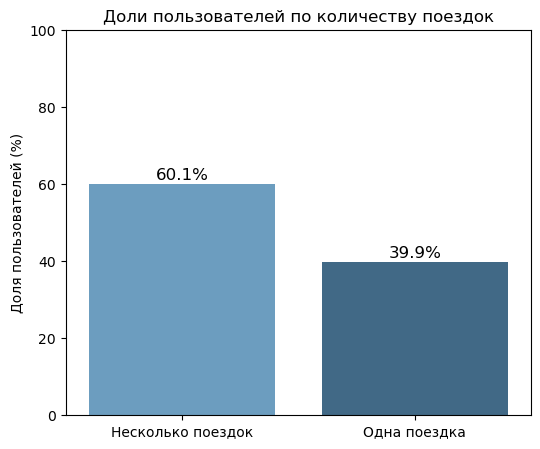

In [ ]:
# количество поездок у каждого пользователя
trip_counts = df['party_rk'].value_counts()

user_groups = trip_counts.apply(lambda x: 'Одна поездка' if x == 1 else 'Несколько поездок')

# Считаем долю пользователей в каждой группе
user_group_counts = user_groups.value_counts(normalize=True)

plt.figure(figsize=(6, 5))
sns.barplot(x=user_group_counts.index, y=user_group_counts.values * 100, palette="Blues_d")
plt.title('Доли пользователей по количеству поездок')
plt.ylabel('Доля пользователей (%)')
plt.xlabel('')
plt.ylim(0, 100)

for i, v in enumerate(user_group_counts.values):
    plt.text(i, v * 100 + 1, f"{v * 100:.1f}%", ha='center', fontsize=12)

plt.show()

А ниже учитываются **только состоявшиеся поездки**.

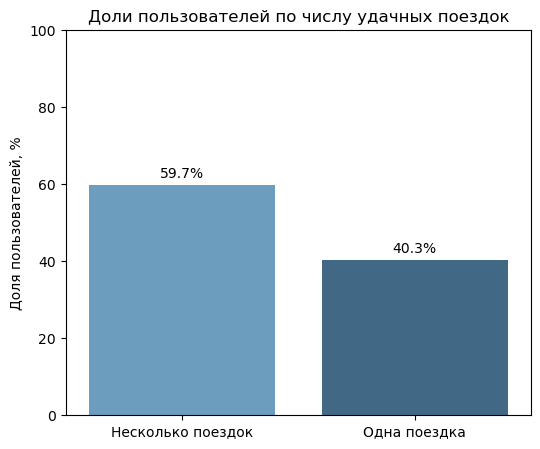

In [ ]:
successful_trips = df[df['status'] == 'successful']
trip_counts = successful_trips['party_rk'].value_counts()

single_trip = (trip_counts == 1).sum()
multiple_trips = (trip_counts > 1).sum()
total_users = trip_counts.count()

share_single = single_trip / total_users
share_multiple = multiple_trips / total_users

labels = ['Несколько поездок', 'Одна поездка']
shares = [share_multiple, share_single]

plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=[s * 100 for s in shares], palette="Blues_d")
plt.ylabel('Доля пользователей, %')
plt.title('Доли пользователей по числу удачных поездок')
plt.ylim(0, 100)

for i, v in enumerate(shares):
    plt.text(i, v*100 + 2, f"{v*100:.1f}%", ha='center')

plt.show()

#### Распределение пользователей по числу успешных поездок, создание флага для лояльных пользователей

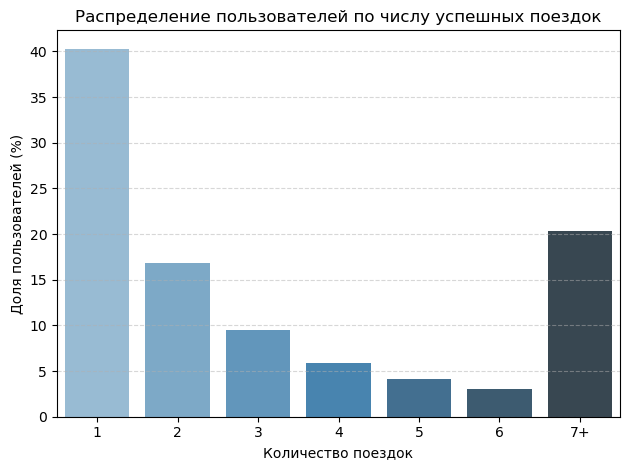

In [ ]:
# считаем количество успешных поездок на пользователя
df_success = df[df['status'] == 'successful']
user_trip_counts = df_success.groupby('party_rk')['order_rk'].count()

bins = [0, 1, 2, 3, 4, 5, 6, float('inf')]
labels = ['1', '2', '3', '4', '5', '6', '7+']
trip_bins = pd.cut(user_trip_counts, bins=bins, labels=labels, right=True)

# Подсчёт
trip_distribution = trip_bins.value_counts(normalize=True).sort_index()
trip_distribution *= 100  # проценты

sns.barplot(x=trip_distribution.index, y=trip_distribution.values, palette="Blues_d")
plt.title('Распределение пользователей по числу успешных поездок')
plt.xlabel('Количество поездок')
plt.ylabel('Доля пользователей (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Около 20% пользователей совершили 7 и более поездок за сезон. Будем считать их лояльными** и дополнительно сравним портреты лояльных и нелояльных пользователей в следующем разделе.

In [ ]:
loyal_users = user_trip_counts[user_trip_counts >= 7].index

df['is_loyal'] = df['party_rk'].isin(loyal_users)

In [ ]:
df['is_loyal'].value_counts()

is_loyal
True     260871
False    100927
Name: count, dtype: int64

In [ ]:
# кол-во лояльных пользователей за сезон
loyal_users.nunique()

11959

#### Среднее число поездок на каждого пользователя

In [ ]:
# кол-во поездок на каждого пользователя:
# df[df['status'] == 'successful'].groupby('party_rk').size()

# среднее кол-во поездок на пользователя
average_trips_per_user = df[df['status'] == 'successful'].groupby('party_rk').size().mean()

print(f'Среднее число успешных поездок на пользователя в 2024 году: {average_trips_per_user:.2f}')

Среднее число успешных поездок на пользователя в 2024 году: 5.94


In [ ]:
average_trips_per_loyal_user = df[df['is_loyal'] == 1].groupby('party_rk').size().mean()
average_trips_per_non_loyal_user = df[df['is_loyal'] == 0].groupby('party_rk').size().mean()

print(f'Среднее число успешных поездок на пользователя в 2024 году (среди лояльных пользователей): {average_trips_per_loyal_user:.2f}')
print(f'Среднее число успешных поездок на пользователя в 2024 году (среди остальных пользователей): {average_trips_per_non_loyal_user:.2f}')

Среднее число успешных поездок на пользователя в 2024 году (среди лояльных пользователей): 21.81
Среднее число успешных поездок на пользователя в 2024 году (среди остальных пользователей): 2.11


**Заодно посчитаем количество пользователей и поездок за сезон 2024**

Поскольку при очистке данных мы удалили ок. 35 тысяч строк, а значит и потенциальных поездок, данные могут быть искажены.

In [ ]:
# кол-во пользователей за сезон
df['party_rk'].nunique()

59679

In [ ]:
# количество успешных поездок за сезон
len(df[df['status'] == 'successful'])

349171

In [ ]:
# кол-во всех поездок за сезон
len(df)

361798

#### Как первый опыт (наличие кешбэка, акция 100% кешбэка на первую поездку, неудача) влияет на возвращаемость

In [ ]:
# первая поездка каждого пользователя
first_trips = df.sort_values('book_start_dttm').groupby('party_rk').first().reset_index()

# добавим признак, вернулся ли пользователь
trip_counts = df['party_rk'].value_counts()
first_trips['returned'] = first_trips['party_rk'].map(lambda x: trip_counts[x] > 1)

# добавим признак наличия кешбэка при первой поездке
first_trips['had_loyalty'] = first_trips['has_loyalty'] == 1

# добавим признак участия в акции 100% кешбэка за первую поездку
first_trips['promo_100_cashback'] = first_trips['has_100_percent_cashback'] == 1

# добавим признак неудачной поездки
first_trips['failed'] = first_trips['status'].isin(['failed_paid', 'failed_free'])

# сгруппируем по этим признакам и посчитаем долю вернувшихся
return_by_loyalty = first_trips.groupby('had_loyalty')['returned'].mean()
return_by_promo = first_trips.groupby('promo_100_cashback')['returned'].mean()
return_by_failed = first_trips.groupby('failed')['returned'].mean()

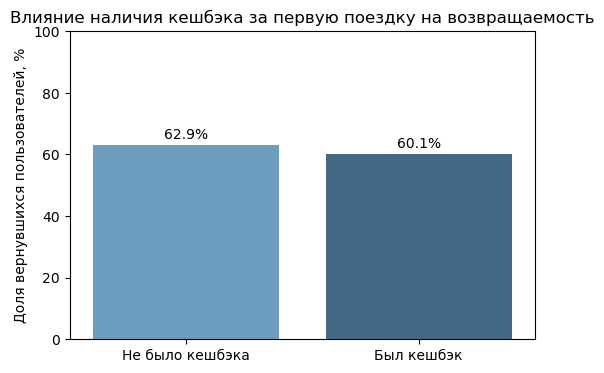

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=return_by_loyalty.index.map({True: 'Был кешбэк', False: 'Не было кешбэка'}),
    y=return_by_loyalty.values * 100,
    palette="Blues_d"
)
plt.ylabel('Доля вернувшихся пользователей, %')
plt.xlabel('')
plt.title('Влияние наличия кешбэка за первую поездку на возвращаемость')
plt.ylim(0, 100)
for i, v in enumerate(return_by_loyalty.values):
    plt.text(i, v*100 + 2, f"{v*100:.1f}%", ha='center')
plt.show()

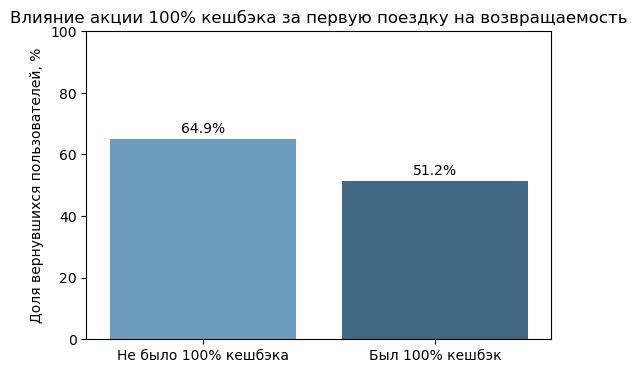

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=return_by_promo.index.map({True: 'Был 100% кешбэк', False: 'Не было 100% кешбэка'}),
    y=return_by_promo.values * 100,
    palette="Blues_d"
)
plt.xlabel('')
plt.ylabel('Доля вернувшихся пользователей, %')
plt.title('Влияние акции 100% кешбэка за первую поездку на возвращаемость')
plt.ylim(0, 100)
for i, v in enumerate(return_by_promo.values):
    plt.text(i, v*100 + 2, f"{v*100:.1f}%", ha='center')
plt.show()

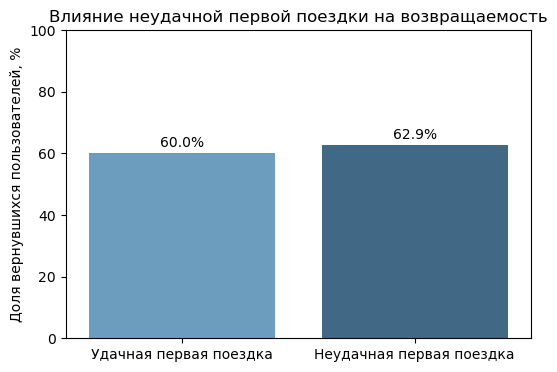

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=return_by_failed.index.map({True: 'Неудачная первая поездка', False: 'Удачная первая поездка'}),
    y=return_by_failed.values * 100,
    palette="Blues_d"
)
plt.xlabel('')
plt.ylabel('Доля вернувшихся пользователей, %')
plt.title('Влияние неудачной первой поездки на возвращаемость')
plt.ylim(0, 100)
for i, v in enumerate(return_by_failed.values):
    plt.text(i, v*100 + 2, f"{v*100:.1f}%", ha='center')
plt.show()

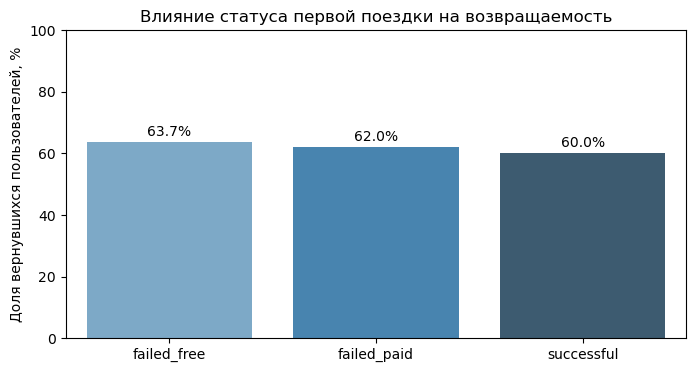

In [ ]:
return_by_status = first_trips.groupby('status')['returned'].mean()
plt.figure(figsize=(8,4))
sns.barplot(
    x=return_by_status.index,
    y=return_by_status.values * 100,
    palette="Blues_d"
)
plt.xlabel('')
plt.ylabel('Доля вернувшихся пользователей, %')
plt.title('Влияние статуса первой поездки на возвращаемость')
plt.ylim(0, 100)
for i, v in enumerate(return_by_status.values):
    plt.text(i, v*100 + 2, f"{v*100:.1f}%", ha='center')
plt.show()

In [ ]:
# пользователи с неудачной первой поездкой
failed_first_trips = first_trips[first_trips['status'].isin(['failed_paid', 'failed_free'])].copy()
failed_first_trips.loc[:, 'returned_successful'] = failed_first_trips['party_rk'].map(lambda x: trip_counts[x] > 0)

# для этих пользователей смотрим, были ли у них потом успешные поездки (кроме первой)
trip_counts = df.groupby('party_rk').apply(lambda x: (x['status'] == 'successfull').sum())

# помечаем, вернулся ли пользователь с успешной поездкой после неудачной первой
failed_first_trips['returned_successful'] = failed_first_trips['party_rk'].map(lambda x: trip_counts[x] > 0)

# доля вернувшихся после неудачной первой поездки
returned_rate_failed_first = failed_first_trips['returned_successful'].mean()

print(f"Доля пользователей, вернувшихся после неудачной первой поездки: {returned_rate_failed_first:.4%}")

Доля пользователей, вернувшихся после неудачной первой поездки: 0.0000%


Убедились, что у пользователей с неудачной первой поездкой, не было в итоге ни одной удачной.

In [ ]:
# пользователи с успешными поездками
successful_counts = df[df['status'] == 'successful'].groupby('party_rk')['order_rk'].count()
successful_users = successful_counts.index

# все пользователи
all_users = df['party_rk'].unique()

# пользователи, у которых НЕТ ни одной успешной поездки
unsuccessful_users = set(all_users) - set(successful_users)

print(f"Пользователей, у которых все поездки были неудачными: {len(unsuccessful_users)}")

Пользователей, у которых все поездки были неудачными: 869


#### Cohort Retention Rate (коэффициент удержания по когортам)

In [ ]:
# оставим только успешные поездки
df_success = df[df['status'] == 'successful'].copy()

# преобразуем к дате без времени
df_success['trip_date'] = df_success['created_dttm'].dt.date

# определим дату первой успешной поездки для каждого пользователя (когорта)
df_success['cohort'] = df_success.groupby('party_rk')['trip_date'].transform('min')

# кол-во дней с момента первой поездки
df_success['days_since_cohort'] = (df_success['trip_date'] - df_success['cohort']).apply(lambda x: x.days)

# сводная таблица: когорта × дни
cohort_pivot = df_success.pivot_table(
    index='cohort',
    columns='days_since_cohort',
    values='party_rk',
    aggfunc='nunique'
)

# Retention: делим на кол-во пользователей в день 0 (размер когорты)
cohort_size = cohort_pivot[0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# cредние значения по всем когортам
retention_7d = retention[7].mean()
retention_14d = retention[14].mean()
retention_30d = retention[30].mean()

print(f"Средний 7-дневный Retention Rate: {retention_7d:.2%}")
print(f"Средний 14-дневний Retention Rate: {retention_14d:.2%}")
print(f"Средний 30-дневний Retention Rate: {retention_30d:.2%}")

Средний 7-дневный Retention Rate: 7.49%
Средний 14-дневний Retention Rate: 7.37%
Средний 30-дневний Retention Rate: 5.13%


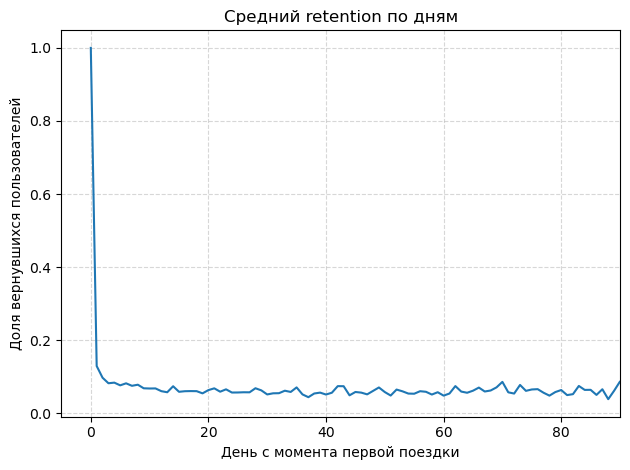

In [ ]:
avg_retention = retention.mean()

sns.lineplot(x=avg_retention.index, y=avg_retention.values)
plt.title('Средний retention по дням')
plt.xlabel('День с момента первой поездки')
plt.ylabel('Доля вернувшихся пользователей')
plt.xlim(-5, 90)
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Выводы по возвращаемости и удержанию

1. **Около 60% пользователей совершили минимум две успешные поездки** за сезон 2024 года. Остальные 40% воспользовались сервисом один раз, другими словами **многие пользователи тестируют сервис и не возвращаются**. **Около 20% пользователей совершили 7 и более поездок за сезон - будем считать их лояльными.**
2. В среднем **каждый пользователь воспользовался самокатом 5,94 раз** за сезон 2024 года, **каждый лояльный пользователь совершил в среднем 21,81 поездку**.
3. Первый опыт пользователя влияет на то, вернётся ли он снова, но не всегда так, как ожидается.
    * Пользователи с кешбэком и участники акции 100% кешбэка не всегда возвращаются чаще, чем те, кто кешбэка не получил. Это может означать, что **кешбэк привлекает новых пользователей попробовать сервис, но не всегда делает их постоянными**.
    * **Пользователи, у которых первая поездка была неудачной, возвращаются даже чуть чаще, чем те, у кого первая поездка прошла хорошо. Возможно, они пытаются повторить попытку и исправить плохой опыт. Тем не менее, ни один из них так и не добился успешной поездки, несмотря на повторные попытки.**
    * Однако неудачных поездок и поездок без кешбэка в выборке немного, поэтому эти выводы стоит принимать осторожно.
4. **7,5% пользователей возвращаются в сервис в течение 7 дней после первой успешной поездки.**

### 7. Профиль пользователей: пол, возраст, образование, семейное положение. Сравнение портретов лояльных пользователей с остальными.

#### Соотношение мужчин и женщин

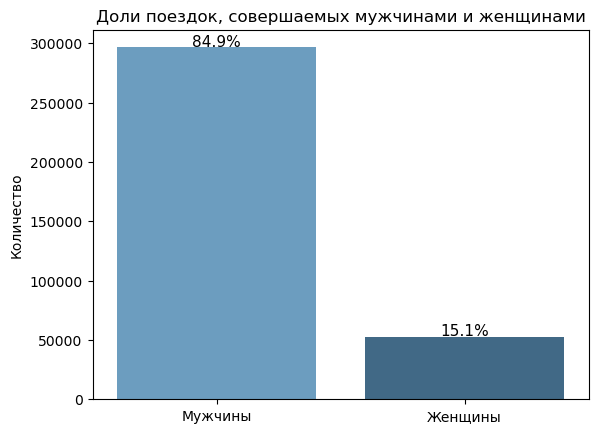

In [ ]:
age_counts = df[df['status'] == 'successful']['gender_cd'].value_counts()
total = age_counts.sum()

sns.countplot(data=df[df['status'] == 'successful'], x='gender_cd', palette="Blues_d")

for i, count in enumerate(age_counts):
    percent = 100 * count / total
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Доли поездок, совершаемых мужчинами и женщинами')
plt.xticks([0, 1], ['Мужчины', 'Женщины'])
plt.xlabel('')
plt.ylabel('Количество')
plt.show()

#### Распределение возраста мужчин и женщин

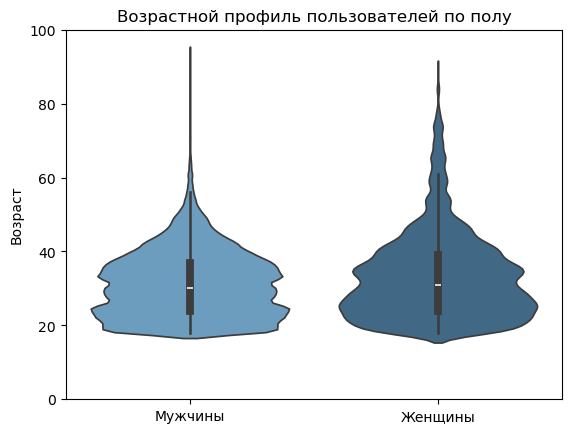

In [ ]:
sns.violinplot(data=df, x='gender_cd', y='age', palette="Blues_d")

plt.title('Возрастной профиль пользователей по полу')
plt.ylabel('Возраст')
plt.xlabel('')
plt.xticks([0, 1], ['Мужчины', 'Женщины'])
plt.ylim(0, 100)

plt.show()

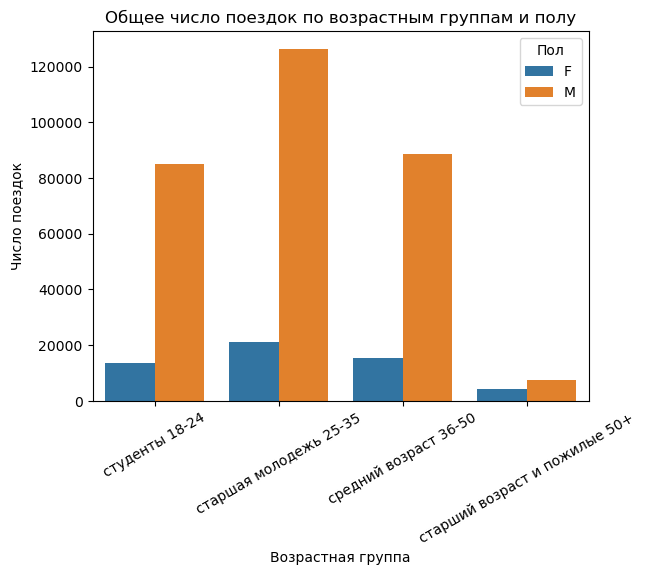

In [ ]:
age_order = ['студенты 18-24', 'старшая молодежь 25-35', 'средний возраст 36-50', 'старший возраст и пожилые 50+']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)
df_grouped = df.groupby(['age_group', 'gender_cd']).size().reset_index(name='trip_count')

sns.barplot(data=df_grouped, x='age_group', y='trip_count', hue='gender_cd')
plt.title('Общее число поездок по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Число поездок')
plt.xticks(rotation=30)
plt.legend(title='Пол')
plt.show()

#### Количество поездок в зависимости от пола, семейного положения, образования и возраста

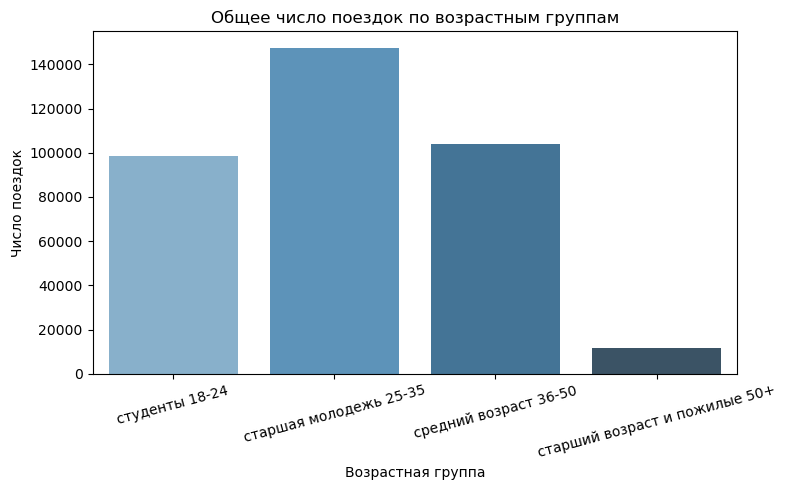

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', palette="Blues_d")
plt.title('Общее число поездок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Число поездок')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
df_grouped = df[df['status'] == 'successful'].groupby('party_rk').size().reset_index(name='trip_count')
user_info = df.drop_duplicates('party_rk')[['party_rk', 'gender_cd', 'age', 'age_group', 'education_level_cd', 'marital_status_cd']]
df_grouped = df_grouped.merge(user_info, on='party_rk')

In [ ]:
df_grouped.head()

,party_rk,trip_count,gender_cd,age,age_group,education_level_cd,marital_status_cd
0,14717,1,M,43,средний возраст 36-50,UGR,CIV
1,15725,2,M,40,средний возраст 36-50,GRD,UNM
2,22290,6,M,53,старший возраст и пожилые 50+,UGR,CIV
3,22530,4,M,38,средний возраст 36-50,PGR,MAR
4,27063,1,M,53,старший возраст и пожилые 50+,PGR,MAR


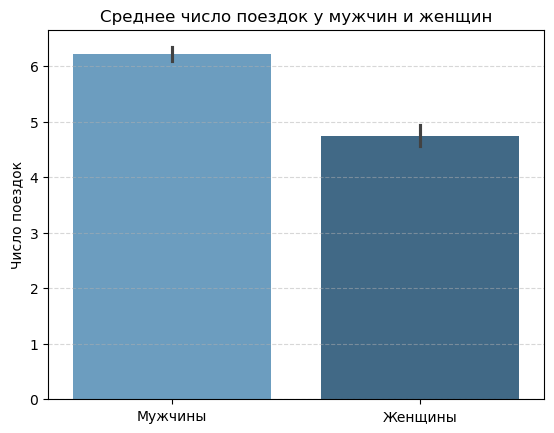

In [ ]:
sns.barplot(data=df_grouped, x='gender_cd', y='trip_count', palette="Blues_d")
plt.title('Среднее число поездок у мужчин и женщин')
plt.xlabel('')
plt.ylabel('Число поездок')
plt.xticks([0, 1], ['Мужчины', 'Женщины'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

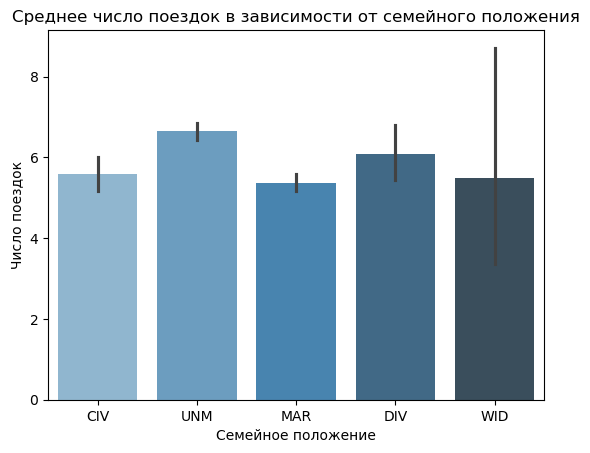

In [ ]:
sns.barplot(data=df_grouped, x='marital_status_cd', y='trip_count', palette="Blues_d")
plt.title('Среднее число поездок в зависимости от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Число поездок')
plt.show()

Семейный статус человека:
* CIV — в гражданском браке
* UNM — холост/не замужем
* MAR — женат/замужем
* DIV — разведен(а)
* WID — вдовец/вдовавец/вдова

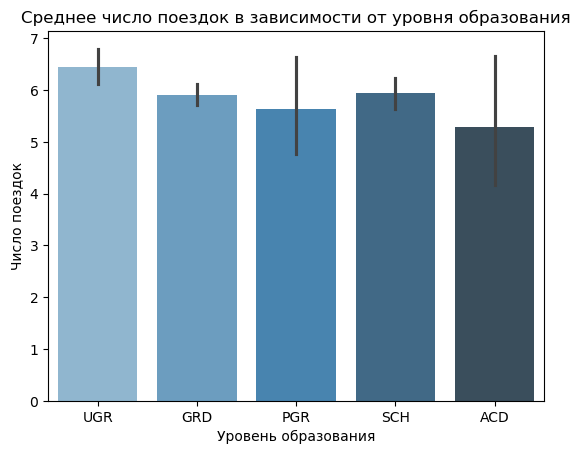

In [ ]:
sns.barplot(data=df_grouped, x='education_level_cd', y='trip_count', palette="Blues_d")
plt.title('Среднее число поездок в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Число поездок')
plt.show()

Уровень образования клиента:
* SCH — начальное, среднее
* GRD — высшее
* UGR — неполное высшее
* PGR — два высших
* ACD — ученая степень

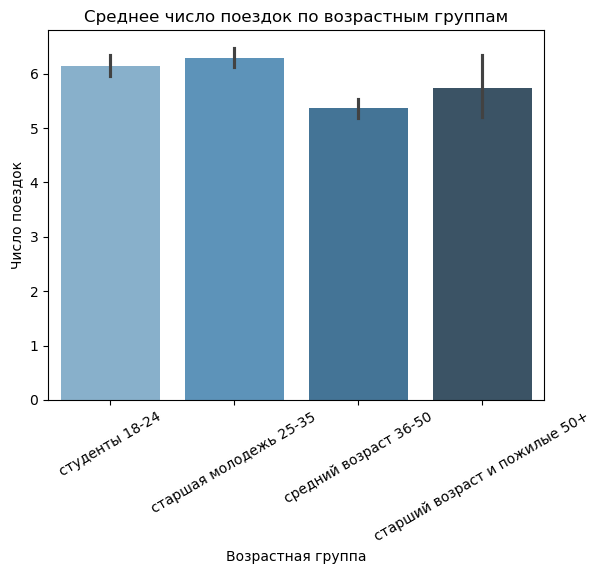

In [ ]:
age_order = ['студенты 18-24', 'старшая молодежь 25-35', 'средний возраст 36-50', 'старший возраст и пожилые 50+']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)

sns.barplot(data=df_grouped, x='age_group', y='trip_count', order=age_order, palette="Blues_d")
plt.title('Среднее число поездок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Число поездок')
plt.xticks(rotation=30)
plt.show()

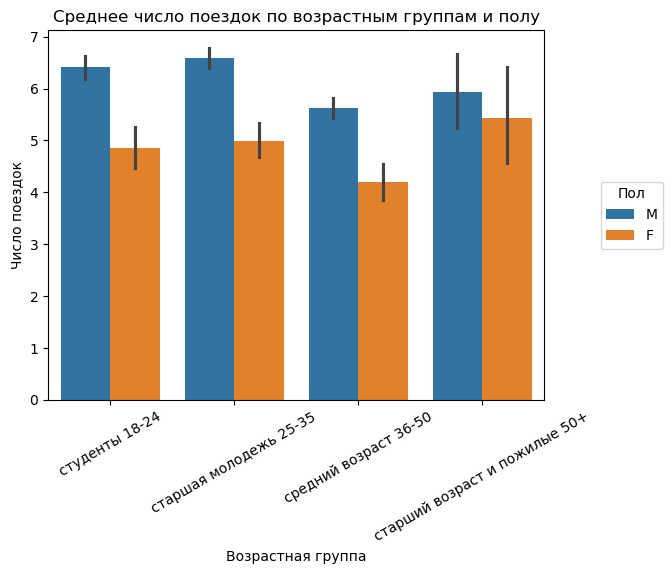

In [ ]:
age_order = ['студенты 18-24', 'старшая молодежь 25-35', 'средний возраст 36-50', 'старший возраст и пожилые 50+']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)

sns.barplot(data=df_grouped, x='age_group', y='trip_count', hue='gender_cd')
plt.title('Среднее число поездок по возрастным группам и полу')
plt.xlabel('Возрастная группа')
plt.ylabel('Число поездок')
plt.xticks(rotation=30)
plt.legend(title='Пол', loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

#### Сравнение портретов лояльных пользователей с остальными

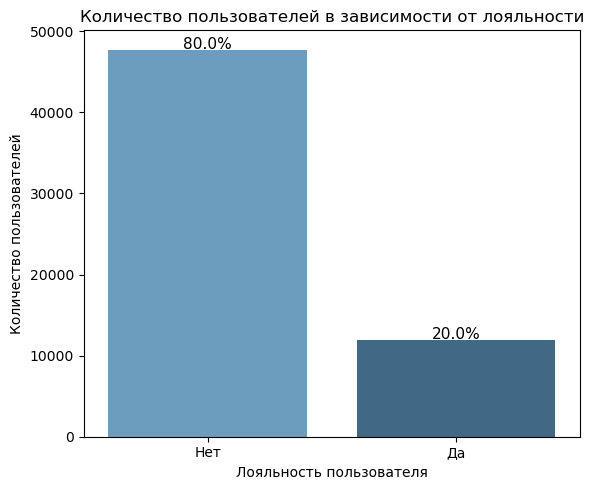

In [ ]:
user_counts = df.groupby('is_loyal')['party_rk'].nunique()
total_users = user_counts.sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="Blues_d")

for i, count in enumerate(user_counts):
    percent = 100 * count / total_users
    plt.text(i, count + 100, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество пользователей в зависимости от лояльности')
plt.xlabel('Лояльность пользователя')
plt.ylabel('Количество пользователей')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.tight_layout()
plt.show()

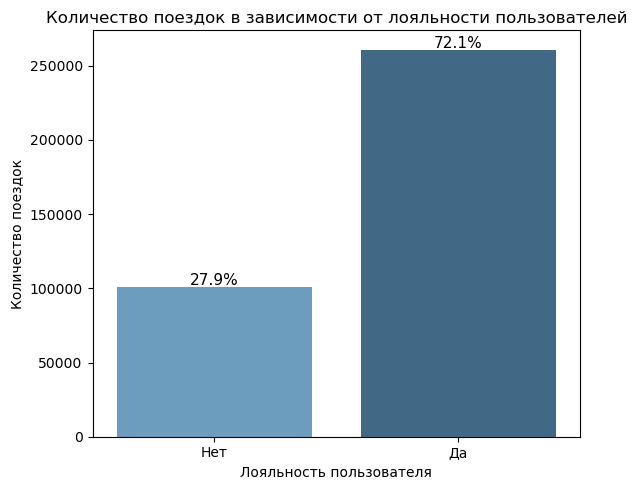

In [ ]:
trip_counts = df.groupby('is_loyal')['party_rk'].count()
total_trips = trip_counts.sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=trip_counts.index, y=trip_counts.values, palette="Blues_d")

for i, count in enumerate(trip_counts):
    percent = 100 * count / total_trips
    plt.text(i, count + 1000, f'{percent:.1f}%', ha='center', fontsize=11)

plt.title('Количество поездок в зависимости от лояльности пользователей')
plt.xlabel('Лояльность пользователя')
plt.ylabel('Количество поездок')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.tight_layout()
plt.show()

Интересно, что здесь работает закон Парето: 20% лояльных пользователей совершили почти 80% всех поездок.

| Признак                                | Зачем сравниваем                          |
| -------------------------------------- | ----------------------------------------- |
| `age`                                  | Относятся ли к разным возрастным группам лояльные и остальные пользователи?|
| `nominal_price_rub_amt`, `minute_cost`, `activation_cost`| Больше ли тратят лояльные за каждую отдельную поездку?|
| `distance_km`, `duration_min`          | Как отличаются по поведению в поездках?   |
| `start_hour`, `weekday_name`| В какое время суток и день недели чаще ездят?|

**Возраст 'age'**

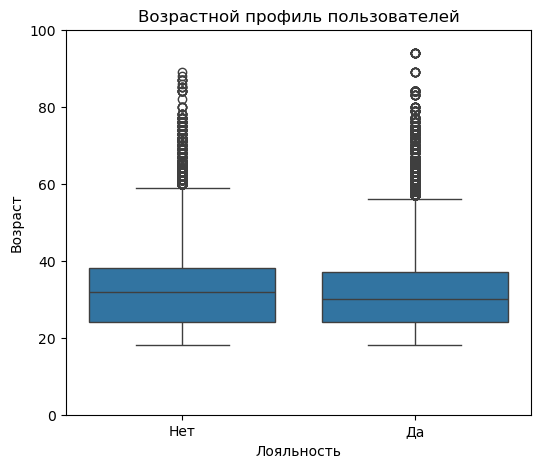

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_loyal', y='age')
plt.title('Возрастной профиль пользователей')
plt.ylabel('Возраст')
plt.xlabel('Лояльность')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.ylim(0, 100)
plt.show()

**Километраж 'distance_km' и длительность поездки 'duration_min'**

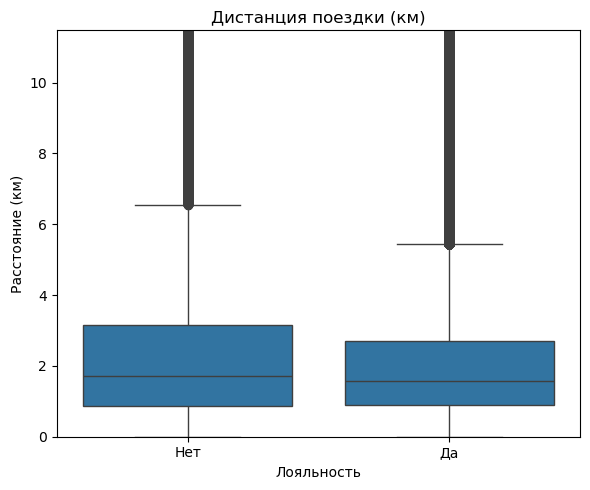

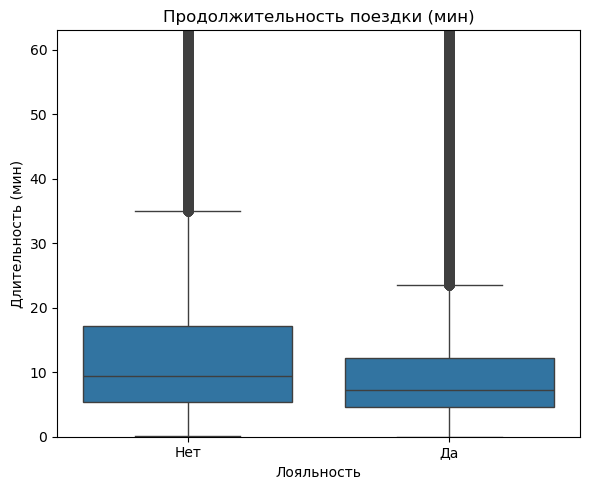

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_loyal', y='distance_km')
plt.title('Дистанция поездки (км)')
plt.ylabel('Расстояние (км)')
plt.xlabel('Лояльность')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.ylim(0, df['distance_km'].quantile(0.99))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_loyal', y='duration_min')
plt.title('Продолжительность поездки (мин)')
plt.ylabel('Длительность (мин)')
plt.xlabel('Лояльность')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.ylim(0, df['duration_min'].quantile(0.99))
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('is_loyal')[['distance_km']].describe()

distance_km                                                         \
               count      mean       std  min       25%       50%       75%   
is_loyal                                                                      
False       100927.0  2.533261  3.115518  0.0  0.869463  1.718218  3.145042   
True        260871.0  2.142660  2.115459  0.0  0.893154  1.581227  2.709427   

                     
                max  
is_loyal             
False     79.891783  
True      64.636923

In [ ]:
df.groupby('is_loyal')[['duration_min']].describe()

duration_min                                                       
                count       mean        std   min   25%   50%    75%     max
is_loyal                                                                    
False        100927.0  14.513658  17.525425  0.15  5.37  9.40  17.20  715.17
True         260871.0  10.163460  10.285673  0.03  4.55  7.28  12.15  616.95

**Стоимость - 'nominal_price_rub_amt', 'minute_cost', 'activation_cost'**

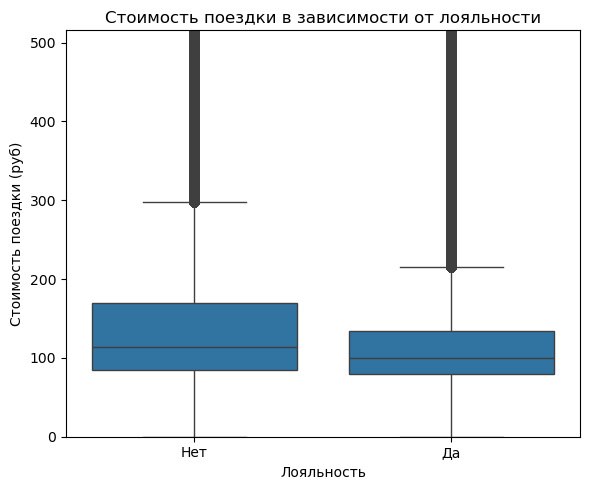

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_loyal', y='nominal_price_rub_amt')
plt.title('Стоимость поездки в зависимости от лояльности')
plt.ylabel('Стоимость поездки (руб)')
plt.xlabel('Лояльность')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.ylim(0, df['nominal_price_rub_amt'].quantile(0.99))
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('is_loyal')[['nominal_price_rub_amt']].describe()

nominal_price_rub_amt                                              \
                         count        mean         std  min    25%     50%   
is_loyal                                                                     
False                 100927.0  150.238747  134.237917  0.0  84.89  114.37   
True                  260871.0  117.765722   77.243137  0.0  79.90  100.12   

                           
             75%      max  
is_loyal                   
False     169.85  5627.64  
True      133.87  4362.83

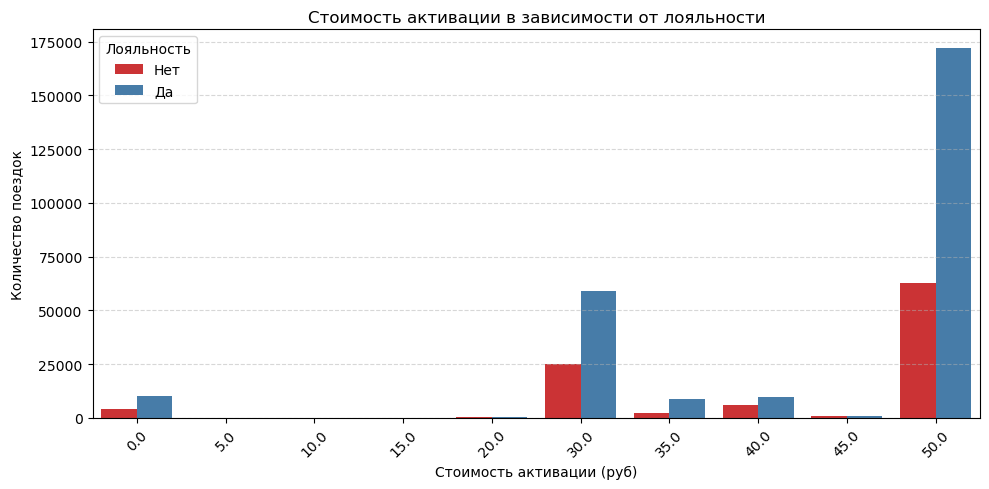

In [ ]:
plt.figure(figsize=(10, 5))

order = sorted(df['activation_cost'].unique())

sns.countplot(data=df, x='activation_cost', hue='is_loyal', order=order, palette="Set1")

plt.title('Стоимость активации в зависимости от лояльности')
plt.xlabel('Стоимость активации (руб)')
plt.ylabel('Количество поездок')
plt.legend(title='Лояльность', labels=['Нет', 'Да'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

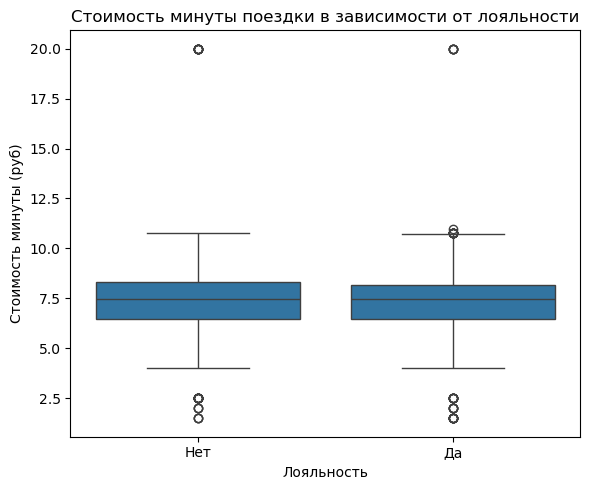

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='is_loyal', y='minute_cost')
plt.title('Стоимость минуты поездки в зависимости от лояльности')
plt.xlabel('Лояльность')
plt.ylabel('Стоимость минуты (руб)')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.tight_layout()
plt.show()

**Время суток и день недели 'start_hour', 'weekday_name'**

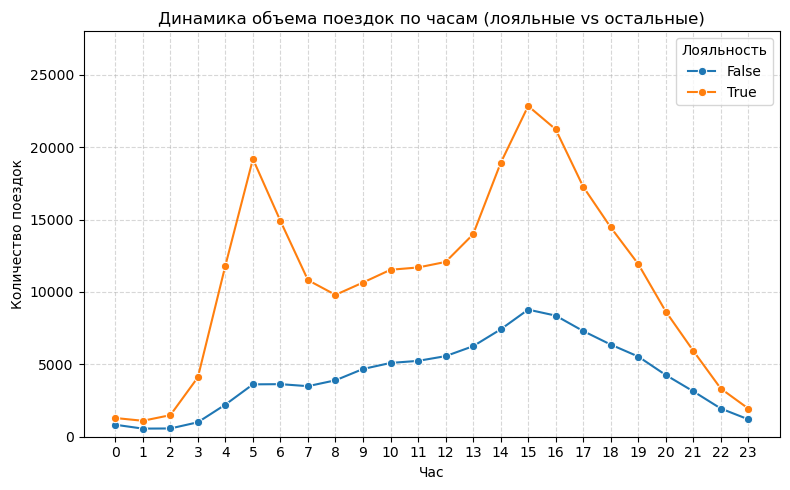

In [ ]:
hour_data = df.groupby(['start_hour', 'is_loyal']).size().reset_index(name='Количество поездок')

plt.figure(figsize=(8, 5))
sns.lineplot(data=hour_data, x='start_hour', y='Количество поездок', hue='is_loyal', marker='o')

plt.title('Динамика объема поездок по часам (лояльные vs остальные)')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.ylim(0, 28000)
plt.xticks(ticks=range(24), labels=range(24))
plt.legend(title='Лояльность')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

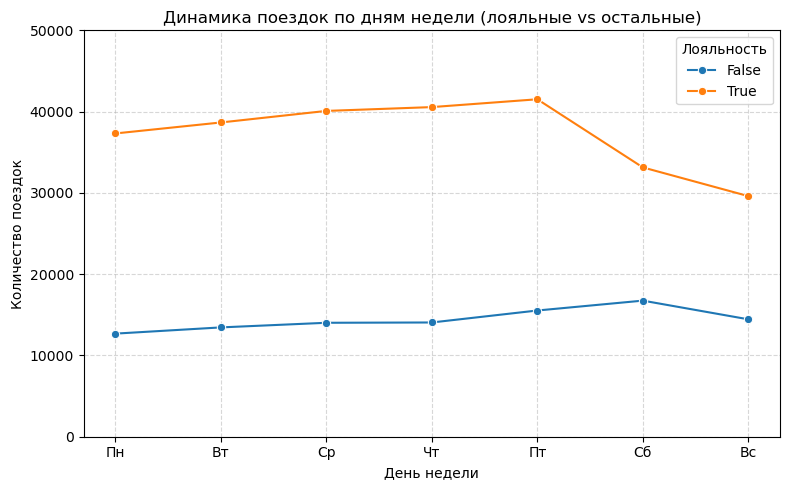

In [ ]:
df['weekday_name'] = pd.Categorical(
    df['weekday_name'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

weekday_data = df.groupby(['weekday_name', 'is_loyal']).size().reset_index(name='Количество поездок')
weekday_data = weekday_data.sort_values('weekday_name')

plt.figure(figsize=(8, 5))
sns.lineplot(data=weekday_data, x='weekday_name', y='Количество поездок', hue='is_loyal', marker='o')

plt.title('Динамика поездок по дням недели (лояльные vs остальные)')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.ylim(0, 50000)
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.legend(title='Лояльность')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Выводы по профилю пользователей

1. **Большинство поездок (85%) на самокатах совершают мужчины**. Также мужчины в среднем совершают больше поездок за сезон, чем женщины (6 против 5, соответственно).
2. **После 55-60 лет мужчины практически перестают использовать самокаты, в то время как женщины более активны**, хотя в абсолютном выражении мужчин все еще больше в этой возрастной группе.
3. **Большинство поездок совершает молодежь в возрасте 25-35 лет** - это платёжеспособная группа молодежи.
4. Семейное положение и уровень образования почти не влияют на спрос (количество поездок), однако у свободных людей (холостых и разведенных) в среднем чуть больше поездок, чем у семейных.
5. **Сравнение портретов лояльных пользователей с остальными:**
   * **средняя поездка у лояльных пользователей немного короче по расстоянию и времени**, поэтому такие **поездки в среднем стоят дешевле**, хотя различия не существенны
   * отличий в стоимости активации поездки и стоимости одной минуты обнаружено не было, по возрасту также нет различий
   * **Лояльные пользователи совершают поездки** преимущественно **в будние дни рано утром и после обеда**, что указывает на то, что лояльные пользователи **используют самокаты в качестве _транспортного средства_ от дома на работу и учебу и обратно**.
   * В то время как **остальные пользователи чаще активны на выходных, особенно в дневные часы**, что может свидетельствовать об **использовании сервиса в _развлекательных целях_**.
   * Так, лояльных пользователей от остальных отличает **_цель поездки_**. Лояльные клиенты воспринимают сервис как дополнительный вид транспорта, а остальные — как развлечение и досуг.
   * Поэтому для повышения удержания и лояльности пользователей стоит ориентироваться на формирование привычки использовать самокат как дополнительный вид транспорта. Например, можно запустить промо-акцию с предложением прокатиться на самокате до работы/учёбы по сниженной стоимости за минуту в утренние часы по будням (с 4:00 до 10:00). Такая мера простимулирует пользователей попробовать кикшеринг как альтернативу или дополнительное средство привычным видам траспорта. А при повторении поездок поможет закрепить привычку использовать сервис ежедневно, а не эпизодически.

### 8. География: регионы-лидеры по числу уникальных пользователей оттуда

#### Регионы-лидеры по числу уникальных пользователей оттуда

Важно отметить, что регион проживания пользователя не обязательно совпадает с регионом, в котором он совершает поездки. Например, житель Москвы может использовать сервис в других регионах во время путешествия или командировок. Поэтому количество пользователей из региона проживания не всегда отражает фактическую активность в этом регионе, и этот показатель не стоит напрямую интерпретировать как число поездок, совершаемых именно там.

In [ ]:
region_df = pd.DataFrame(df.drop_duplicates('party_rk').groupby('lvn_state_nm').size().sort_values(ascending=False).head(10).reset_index())
region_df.columns = ['Регион', 'Кол-во пользователей из региона']
region_df

,Регион,Кол-во пользователей из региона
0,Г МОСКВА,15582
1,ОБЛ МОСКОВСКАЯ,5815
2,Г САНКТ-ПЕТЕРБУРГ,5237
3,ОБЛ СВЕРДЛОВСКАЯ,3880
4,КРАЙ КРАСНОДАРСКИЙ,2075
5,РЕСП ТАТАРСТАН,1693
6,РЕСП БАШКОРТОСТАН,1495
7,ОБЛ НОВОСИБИРСКАЯ,1435
8,ОБЛ НИЖЕГОРОДСКАЯ,1415
9,РЕСП УДМУРТСКАЯ,1130


### 9. Доходность: каков доход с поездок, средний, медианный доход за одну поездку, ARPU, ARPPU. Общий и средний доход в зависимости от времени суток, дней недели и возрастной группы

#### Общий доход с поездок, средний, медианный доход за поездку, ARPU за сезон

Добавим колонку с доходом с поездки с учётом кешбэков

In [ ]:
df['profit'] = df['nominal_price_rub_amt'] - df['loyalty_accrual_rub_amt'] - df['loyalty_accrual_bns_amt']

Надо помнить, что значения общего дохода могут быть сильно занижены,
поскольку при очистке данных мы удалили большое количество строк (порядка 9%)
из-за завышенного кешбэка и аномальных значений скоростей и километража.
Средние и медианные значения не должны быть сильно искажены.

In [ ]:
total_profit = df['profit'].sum()
avg_profit_per_trip = df['profit'].mean()
median_profit_per_trip = df['profit'].median()
ARPU = total_profit / df['party_rk'].nunique()

total_profit_loyal = df[df['is_loyal'] == 1]['profit'].sum()
total_profit_others = df[df['is_loyal'] == 0]['profit'].sum()
ARPU_from_loyal_users = total_profit_loyal / df[df['is_loyal'] == 1]['party_rk'].nunique()
ARPU_from_non_loyal_users = total_profit_others / df[df['is_loyal'] == 0]['party_rk'].nunique()

print(f"Общий доход за сезон: {total_profit:.0f} усл. ден. ед.")
print(f"Общий доход с лояльных пользователей за сезон: {total_profit_loyal:.0f} усл. ден. ед.")
print(f"Общий доход с остальных пользователей за сезон: {total_profit_others:.0f} усл. ден. ед.")
print(f"Доля дохода с лояльных пользователей: {total_profit_loyal / total_profit:.0%}\n")
print(f"Средний доход за поездку: {avg_profit_per_trip:.2f} усл. ден. ед.")
print(f"Медианный доход за поездку: {median_profit_per_trip:.2f} усл. ден. ед. \n")
print(f"ARPU (средняя выручка с пользователя) за сезон: {ARPU:.2f} усл. ден. ед.")
print(f"ARPU (средняя выручка с лояльных пользователя) за сезон: {ARPU_from_loyal_users:.2f} усл. ден. ед.")
print(f"ARPU (средняя выручка с остальных пользователя) за сезон: {ARPU_from_non_loyal_users:.2f} усл. ден. ед.")

Общий доход за сезон: 33065342 усл. ден. ед.
Общий доход с лояльных пользователей за сезон: 24303258 усл. ден. ед.
Общий доход с остальных пользователей за сезон: 8762084 усл. ден. ед.
Доля дохода с лояльных пользователей: 74%

Средний доход за поездку: 91.39 усл. ден. ед.
Медианный доход за поездку: 78.75 усл. ден. ед. 

ARPU (средняя выручка с пользователя) за сезон: 554.05 усл. ден. ед.
ARPU (средняя выручка с лояльных пользователя) за сезон: 2032.21 усл. ден. ед.
ARPU (средняя выручка с остальных пользователя) за сезон: 183.61 усл. ден. ед.


In [ ]:
paying_users = df[df['profit'] > 0]['party_rk'].nunique()
ARPPU = total_profit / paying_users
print(f"ARPPU (на платящего пользователя): {ARPPU:.2f} усл. ден. ед.")

ARPPU (на платящего пользователя): 674.24 усл. ден. ед.


In [ ]:
df['cashback_share'] = (df['loyalty_accrual_rub_amt'] + df['loyalty_accrual_bns_amt']) / df['nominal_price_rub_amt']
print(f"Средняя доля кешбэка: {df['cashback_share'].mean():.2%}")

Средняя доля кешбэка: 25.94%


#### Общий и средний доход в зависимости от времени суток, дней недели и возрастной группы

In [ ]:
result = df.groupby('time_of_day')['profit'].agg(['mean', 'sum'])
result['sum'] = result['sum'].map('{:,.0f}'.format)
result['mean'] = result['mean'].map('{:,.2f}'.format)
print(result)

              mean         sum
time_of_day                   
вечер 17-24  96.54   9,000,756
день 11-17   95.49  13,589,505
ночь 0-6     80.16   3,829,584
утро 6-11    84.68   6,645,497


In [ ]:
result = df.groupby('weekday_name')['profit'].agg(['mean', 'sum'])
result['sum'] = result['sum'].map('{:,.0f}'.format)
result['mean'] = result['mean'].map('{:,.2f}'.format)
print(result)

               mean        sum
weekday_name                  
Monday        87.74  4,386,884
Tuesday       89.19  4,647,698
Wednesday     89.62  4,848,981
Thursday      88.33  4,823,822
Friday        90.64  5,170,789
Saturday      97.58  4,867,067
Sunday        98.08  4,320,101


In [ ]:
result = df.groupby('age_group')['profit'].agg(['mean', 'sum'])
result['sum'] = result['sum'].map('{:,.0f}'.format)
result['mean'] = result['mean'].map('{:,.2f}'.format)
print(result)

                                mean         sum
age_group                                       
студенты 18-24                 85.48   8,430,372
старшая молодежь 25-35         92.04  13,576,256
средний возраст 36-50          95.74   9,941,277
старший возраст и пожилые 50+  94.42   1,117,438


In [ ]:
13_576_256 * 100 / 33_065_342

41.05887064467684

#### Выводы по доходности

1. **Общий доход с поездок за 2024 год составил около 33 миллионов** усл. ден. ед., при этом **средний доход с одной поездки — 91,39 усл. дн. ед., медианный доход — 78,75 усл. ден. ед.**. Отметим, что общая прибыль может быть занижена, поскольку нам пришлось удалить часть "грязных" данных.
2. **20% пользователей мы выделили в группу лояльных**, они совершили 72% всех поездок и **принесли 74% всего дохода**.
3. **ARPU (ср. выручка с пользователя) за сезон составила 554 усл. ден. ед, ARPU с лояльных пользователей — 2031 усл. ден. ед.**
4. В 2024 году **за каждую поездку пользователь в среднем возвращал 26% от стоимости поездки кешбэком**.
5. По времени суток наибольший средний доход с одной поездки наблюдается днём и вечером. **По дням недели наибольший средний доход с поездки приходится на выходные, хотя самый прибыльный день — пятница.**
6. По возрастным группам **наибольший доход приносит молодежь в возрасте 25-35 лет (около 41% всего дохода)**.

### Выводы по второй части EDA

**Выводы по времени активности пользователей**

1. Данные охватывают сезон аренды самокатов 2024 года: 2024-04-10 - 2024-10-21. Данный сервис появился у Т-банка только в прошлом году, а новости о нем - в июне 2024 года, поэтому именно в июне, а не ранее с началом сезона, резко выросли объемы поездок. Похоже обзоры и новости о новом сервисе, а также акции, включающие высокий кешбэк и скидки, поспособствовали росту числа поездок в июле. Так, **самый высокий спрос наблюдался в августе и сентябре**, достигнув 97 тысяч поездок в месяц. В октябре, с наступлением холодов на большей части территории страны, произошел резкий спад. Также в октябре закончились акции. И в целом это конец сезона для кикшеринга.
2. Интерес к самокатам мало зависит от дня недели, но всё-таки в будние дни количество поездок немного больше, чем в выходные. Скорее всего это связано с тем, что **самокаты используют в качестве транспорта до работы/учебы и обратно**. А наибольшее число поездок - в преддверии выходных, в пятницу.
3. **Пики спроса на самокаты приходятся на раннее утро (5 часов) и послеобеденное время (15 часов).** Высокий спрос ранним утром связан со временем, в которое люди едут на работу и учебу.

**Выводы по характеристикам поездок**

1. **Половина всех поездок осуществляется на короткие дистанции 1-3 км**, около четверти поездок совершается на очень короткие дистанции до 1 км, незначительная доля поездок приходится на длинные дистанции больше 10 км.
2. **Распределение средних значений скоростей имеет распределение, близкое к нормальному.** Так, средняя и медианная скорости составляют 13 км/ч.
3. **Абсолютное большинство (94%) совершаемых поездок длится не дольше получаса.** Практически никто не использует самокат дольше 2 часов.

**Выводы по тарификации и стоимости**

1. **Три четверти (76,8%) поездок совершаются по поминутному тарифу.**
2. **Медианная стоимость минуты поездки составляет 7,49 усл. ден. ед.**
3. **Для большинства поездок стоимость активации составляет 50 усл. ден. ед. - это максимальная сумма**, у четверти поездок стоимость активации - 30 усл. ден. ед.

**Выводы по неудавшимся поездкам**

1. **В 3,5% поездках пользователи испытали негативный опыт и по каким-то причинам быстро отменили поездку, при этом почти за половину таких неудавшихся поездок были списаны денежные средства.**
2. Связи с моделью самоката, временем суток, месяцем, локацией обнаружить не удалось. Похоже, это не какая-то закономерность, а **случайные события**.
3. **Для решения этой проблемы можно рассмотреть внедрение компенсаций и улучшение поддержки пользователей, столкнувшихся с неудачной поездкой.**

**Вывод по кешбэку**

**Абсолютное большинство (98%) поездок сопровождалось начислением кешбэка.** При этом **в 95% случаев кешбэк выплачивался деньгами**, а не баллами, что говорит о расчётах с помощью дебетовой карты. Средний размер кешбэка составляет 36 условных денежных единиц (или баллов), при этом медиана равна 19 — это означает, что **половина пользователей получила кешбэк не более 19 условных единиц**.

**Выводы по возвращаемости и удержанию**

1. **Около 60% пользователей совершили минимум две успешные поездки** за сезон 2024 года. Остальные 40% воспользовались сервисом один раз, другими словами **многие пользователи тестируют сервис и не возвращаются**. **Около 20% пользователей совершили 7 и более поездок за сезон - будем считать их лояльными.**
2. В среднем **каждый пользователь воспользовался самокатом 5,94 раз** за сезон 2024 года, **каждый лояльный пользователь совершил в среднем 21,81 поездку**.
3. Первый опыт пользователя влияет на то, вернётся ли он снова, но не всегда так, как ожидается.
    * Пользователи с кешбэком и участники акции 100% кешбэка не всегда возвращаются чаще, чем те, кто кешбэка не получил. Это может означать, что **кешбэк привлекает новых пользователей попробовать сервис, но не всегда делает их постоянными**.
    * **Пользователи, у которых первая поездка была неудачной, возвращаются даже чуть чаще, чем те, у кого первая поездка прошла хорошо. Возможно, они пытаются повторить попытку и исправить плохой опыт. Тем не менее, ни один из них так и не добился успешной поездки, несмотря на повторные попытки.**
    * Однако неудачных поездок и поездок без кешбэка в выборке немного, поэтому эти выводы стоит принимать осторожно.
4. **7,5% пользователей возвращаются в сервис в течение 7 дней после первой успешной поездки.**

**Выводы по профилю пользователей**

1. **Большинство поездок (85%) на самокатах совершают мужчины**. Также мужчины в среднем совершают больше поездок за сезон, чем женщины (6 против 5, соответственно).
2. **После 55-60 лет мужчины практически перестают использовать самокаты, в то время как женщины более активны**, хотя в абсолютном выражении мужчин все еще больше в этой возрастной группе.
3. **Большинство поездок совершает молодежь в возрасте 25-35 лет** - это платёжеспособная группа молодежи.
4. Семейное положение и уровень образования почти не влияют на спрос (количество поездок), однако у свободных людей (холостых и разведенных) в среднем чуть больше поездок, чем у семейных.
5. **Сравнение портретов лояльных пользователей с остальными:**
   * **средняя поездка у лояльных пользователей немного короче по расстоянию и времени**, поэтому такие **поездки в среднем стоят дешевле**, хотя различия не существенны
   * отличий в стоимости активации поездки и стоимости одной минуты обнаружено не было, по возрасту также нет различий
   * **Лояльные пользователи совершают поездки** преимущественно **в будние дни рано утром и после обеда**, что указывает на то, что лояльные пользователи **используют самокаты в качестве _транспортного средства_ от дома на работу и учебу и обратно**.
   * В то время как **остальные пользователи чаще активны на выходных, особенно в дневные часы**, что может свидетельствовать об **использовании сервиса в _развлекательных целях_**.
   * Так, **лояльных пользователей от остальных отличает _цель поездки_**. Лояльные клиенты воспринимают сервис как дополнительный вид транспорта, а остальные — как развлечение и досуг.
   * Поэтому для повышения удержания и лояльности пользователей стоит ориентироваться на формирование привычки использовать самокат как дополнительный вид транспорта. Например, можно запустить промо-акцию с предложением прокатиться на самокате до работы/учёбы по сниженной стоимости за минуту в утренние часы по будням (с 4:00 до 10:00). Такая мера простимулирует пользователей попробовать кикшеринг как альтернативу или дополнительное средство привычным видам транспорта. А при повторении поездок поможет закрепить привычку использовать сервис ежедневно, а не эпизодически.

**Выводы по доходности**

1. **Общий доход с поездок за 2024 год составил около 33 миллионов** усл. ден. ед., при этом **средний доход с одной поездки — 91,39 усл. дн. ед., медианный доход — 78,75 усл. ден. ед.**. Отметим, что общая прибыль может быть занижена, поскольку нам пришлось удалить часть "грязных" данных.
2. **20% пользователей мы выделили в группу лояльных**, они совершили 72% всех поездок и **принесли 74% всего дохода**.
3. **ARPU (ср. выручка с пользователя) за сезон составила 554 усл. ден. ед, ARPU с лояльных пользователей — 2031 усл. ден. ед.**
4. В 2024 году **за каждую поездку пользователь в среднем возвращал 26% от стоимости поездки кешбэком**.
5. По времени суток наибольший средний доход с одной поездки наблюдается днём и вечером. **По дням недели наибольший средний доход с поездки приходится на выходные, хотя самый прибыльный день — пятница.**
6. По возрастным группам **наибольший доход приносит молодежь в возрасте 25-35 лет (около 41% всего дохода)**.